In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats.anova import AnovaRM
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
import math
import scipy
import pingouin as pg
import scikit_posthocs as sp
import sys
from math import sqrt

#from google.colab import files

from sklearn import linear_model
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy import stats

In [2]:
output_wide_BestON_OFF = pd.read_csv('output_wide_BestON_OFF.csv', sep = ';', decimal=".")


In [3]:
output_wide_BestON_OFF = output_wide_BestON_OFF.apply(lambda x: x.str.strip() if x.dtype == "object" else x)


In [3]:
output_wide_BestON_OFF.dtypes


patient                                      object
Speed (m/s)                                 float64
Cadence (steps/min)                         float64
Step Time - worst side (s)2                 float64
Step Length - worst side (m)2               float64
                                             ...   
Stance Fraction (% gait cyce) Asymetry N    float64
Stance Time Asymetry N                      float64
Swing Fraction (%gait cycle) Asymetry N     float64
Swing Time Asymetry N                       float64
Group                                        object
Length: 66, dtype: object

In [20]:
output_wide_BestON_OFF.isnull().sum()

patient                                     0
Speed (m/s)                                 0
Cadence (steps/min)                         0
Step Time - worst side (s)2                 0
Step Length - worst side (m)2               0
                                           ..
Stance Fraction (% gait cyce) Asymetry N    0
Stance Time Asymetry N                      0
Swing Fraction (%gait cycle) Asymetry N     0
Swing Time Asymetry N                       0
Group                                       0
Length: 66, dtype: int64

In [21]:
output_wide_BestON_OFF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 66 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   patient                                   68 non-null     object 
 1   Speed (m/s)                               68 non-null     float64
 2   Cadence (steps/min)                       68 non-null     float64
 3   Step Time - worst side (s)2               68 non-null     float64
 4   Step Length - worst side (m)2             68 non-null     float64
 5   Stride Time (s)                           68 non-null     float64
 6   Stride Length (m)                         68 non-null     float64
 7   Step Width (m)                            68 non-null     float64
 8   Stance Fraction - worst side (% cycle)2   68 non-null     float64
 9   Stance Time - worst time t (s)2           68 non-null     float64
 10  Swing Fraction - worst side (% cycle)2  

In [22]:
output_wide_BestON_OFF

patient  Speed (m/s)  Cadence (steps/min)  Step Time - worst side (s)2  \
0        A     0.611469           114.268519                     0.523822   
1        B     0.518247            92.621999                     0.616190   
2        C     0.717643           120.639756                     0.508088   
3        D     0.706150           103.419973                     0.557258   
4        E     0.502049            87.989886                     0.540385   
..     ...          ...                  ...                          ...   
63  Ctrl30     1.175180           127.285420                     0.470905   
64  Ctrl31     0.956920           110.507670                     0.542695   
65  Ctrl32     0.749640           101.455300                     0.591440   
66  Ctrl33     0.809670           107.290230                     0.559250   
67  Ctrl34     0.971970           103.965830                     0.577485   

    Step Length - worst side (m)2  Stride Time (s)  Stride Length (m)  \
0                        0.302693         1.042680           0.650821   
1                        0.365236         1.298505           0.757749   
2                        0.337158         0.989035           0.726702   
3                        0.367137         1.160833           0.842990   
4                        0.280149         1.236000           0.588038   
..                            ...              ...                ...   
63                       0.553275         0.944100           1.125540   
64                       0.521350         1.082000           1.044780   
65                       0.439490         1.187500           0.993000   
66                       0.449720         1.115520           0.923820   
67                       0.556775         1.156720           1.148020   

    Step Width (m)  Stance Fraction - worst side (% cycle)2  \
0         0.124466                                70.166018   
1         0.192545                                72.289140   
2         0.136771                                66.973668   
3         0.184698                                66.018272   
4         0.164062                                70.077342   
..             ...                                      ...   
63        0.161790                                64.047390   
64        0.156660                                66.454435   
65        0.172060                                67.651035   
66        0.161780                                68.019225   
67        0.153980                                65.892035   

    Stance Time - worst time t (s)2  ...  Cv Stride Lenght  CV Double Support  \
0                          0.731670  ...          0.133088           0.064845   
1                          0.939427  ...          0.309330           0.162151   
2                          0.662393  ...          0.226720           0.177430   
3                          0.766362  ...          0.127313           0.105754   
4                          0.866156  ...          0.095313           0.106603   
..                              ...  ...               ...                ...   
63                         0.639500  ...          0.074773           0.092265   
64                         0.359540  ...          0.110014           0.142870   
65                         0.399275  ...          0.205267           0.232910   
66                         0.380305  ...          0.215269           0.187139   
67                         0.380150  ...          0.150712           0.115282   

    CV Stance Fraction  Step Time Asymetry N  Step lenght AsymetryN  \
0             0.025515              0.005713               0.106101   
1             0.051773              0.107760               0.252853   
2             0.031323              0.044568               0.063652   
3             0.016734              0.077761               0.209073   
4             0.027155              0.383606               0.047893   
..                 ...                   ... 

In [23]:
list(output_wide_BestON_OFF)

['patient',
 'Speed (m/s)',
 'Cadence (steps/min)',
 'Step Time - worst side (s)2',
 'Step Length - worst side (m)2',
 'Stride Time (s)',
 'Stride Length (m)',
 'Step Width (m)',
 'Stance Fraction - worst side (% cycle)2',
 'Stance Time - worst time t (s)2',
 'Swing Fraction - worst side (% cycle)2',
 'Swing Time - worst side (s)2',
 'Double Support (% cycle)',
 'Double Support - worst side (% cycle)2',
 'Double Support Worst Time',
 'Double Support Time (s)',
 'Single Support - worst side (% cycle)2',
 'Single Support Time - worst side',
 'hip_flexion_rom_worstside',
 'hip_adduction_rom_worstside',
 'hip_rotation_rom_worstside',
 'knee_angle_rom_worstside',
 'ankle_angle_rom_worstside',
 'hip_flexion_mean_vel_worstside',
 'hip_adduction_mean_vel_worstside',
 'hip_rotation_mean_vel_worstside',
 'knee_angle_r_mean_vel_worstside',
 'ankle_angle_mean_vel_worstside',
 'arm_flex_rom_worstside',
 'arm_add_rom_worstside',
 'elbow_flex_rom_worstside',
 'arm_rot_rom_worstside',
 'pro_sup_rom_wo

In [5]:
def p_rounder(p_value):
    if p_value < .0001:
        p_value = '<.0001'
    else:
        p_value = str((round(p_value,4)))
    return p_value

In [6]:
def bon_correct(p_value,k):
    corrected_p = p_value * ((k *(k-1))/2)
    return p_value, corrected_p

In [7]:
def kw_dunn_post_hoc(df,strat,comp_list, var):
    post_hoc_result_dict = {}
    N = df['rank'].count()
    n_groups = df[strat].nunique()
    for comp in comp_list:
        m1 = df.loc[df[strat] == comp[0]]['rank'].mean()
        n1 = df.loc[df[strat] == comp[0]]['rank'].count()
        m2 = df.loc[df[strat] == comp[1]]['rank'].mean()
        n2 = df.loc[df[strat] == comp[1]]['rank'].count()
        Z = (m1 - m2)/sqrt(((N*(N+1))/12)*((1/n1)+(1/n2)))
        Z = round(Z,4)
        p = stats.norm.sf(abs(Z))
        p, corrected_p = bon_correct(p,n_groups)
        p = p_rounder(p)
        corrected_p = p_rounder(corrected_p)
        comparison = f'{comp[0]} vs. {comp[1]}'
        post_hoc_result_dict[comparison] = [var,Z,p,corrected_p]
    return post_hoc_result_dict

In [8]:
def kw_test(df,stratifier,var):
    result_list = []
    strat_list = []
    comparison_list = []
    counter = 0
    temp_df = df[[stratifier,var]].copy()
    temp_df['rank'] = temp_df[var].rank(method='average')
    for strat in df[stratifier].unique():
        result = df.loc[df[stratifier] == strat][var].values
        result_list.append(result)
        strat_list.append(strat)
    for st in strat_list:
        for st2 in strat_list:
            if st != st2 and [st2,st] not in comparison_list:
                comparison_list.append([st,st2])
    post_hoc_result_dict = kw_dunn_post_hoc(temp_df,stratifier,comparison_list,var)
    if len(result_list) == 2:
        k,p = stats.kruskal(result_list[0],result_list[1])
    if len(result_list) == 3:
        k,p = stats.kruskal(result_list[0],result_list[1],result_list[2])
    elif len(result_list) == 4:
        k,p = stats.kruskal(result_list[0],result_list[1],result_list[2],result_list[3])
    elif len(result_list) == 5:
        k,p = stats.kruskal(result_list[0],result_list[1],result_list[2],result_list[3],result_list[4])
    else:
        print('Stratifying levels greater than 5. Please modify code to accomodate.')
        sys.exit()
    k = round(k,4)    
    p = p_rounder(p)
    return k, p, post_hoc_result_dict

# SPEED

In [24]:
output_wide_BestON_OFF.groupby("Group").describe()["Speed (m/s)"]

count      mean       std       min       25%       50%       75%  \
Group                                                                        
BESTON    17.0  0.933286  0.235959  0.594612  0.757860  0.915802  1.069672   
Control   34.0  0.898176  0.175889  0.604800  0.753947  0.911530  0.981035   
OFF       17.0  0.555042  0.268164  0.000000  0.478769  0.544025  0.717643   

              max  
Group              
BESTON   1.601109  
Control  1.428340  
OFF      0.967739

In [37]:
kw_test(output_wide_BestON_OFF,'Group','Speed (m/s)')

(21.8418,
 '<.0001',
 {'OFF vs. BESTON': ['Speed (m/s)', -3.9549, '<.0001', '0.0001'],
  'OFF vs. Control': ['Speed (m/s)', -4.3164, '<.0001', '<.0001'],
  'BESTON vs. Control': ['Speed (m/s)', 0.2504, '0.4011', '1.2034']})

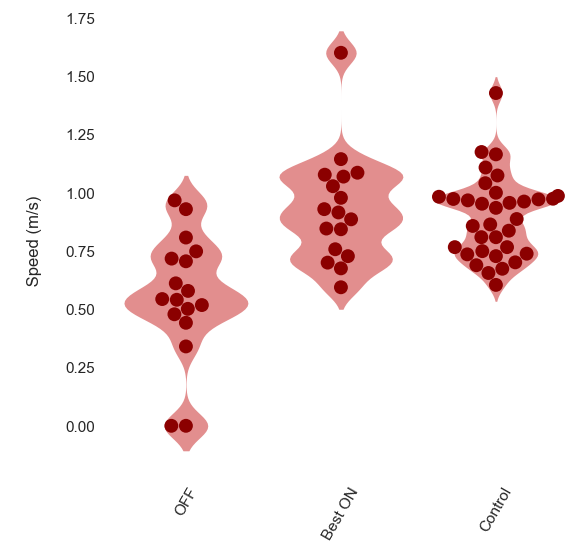

In [49]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Speed (m/s)", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Speed (m/s)", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 10, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Speed (m/s) \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# CADENCE

In [50]:
output_wide_BestON_OFF.groupby("Group").describe()["Cadence (steps/min)"]

count        mean        std        min         25%         50%  \
Group                                                                      
BESTON    17.0  116.381317  14.472716  98.467622  105.942280  112.056738   
Control   34.0  108.118542  11.189918  86.956520  101.076175  109.380515   
OFF       17.0   96.405151  40.380437   0.000000   92.621999  107.558528   

                75%         max  
Group                            
BESTON   128.777613  146.280992  
Control  114.318590  139.746840  
OFF      114.268519  142.934004

In [51]:
kw_test(output_wide_BestON_OFF,'Group','Cadence (steps/min)')

(3.0913,
 '0.2132',
 {'OFF vs. BESTON': ['Cadence (steps/min)', -1.6132, '0.0534', '0.1601'],
  'OFF vs. Control': ['Cadence (steps/min)', -0.3605, '0.3592', '1.0777'],
  'BESTON vs. Control': ['Cadence (steps/min)', 1.5022, '0.0665', '0.1996']})

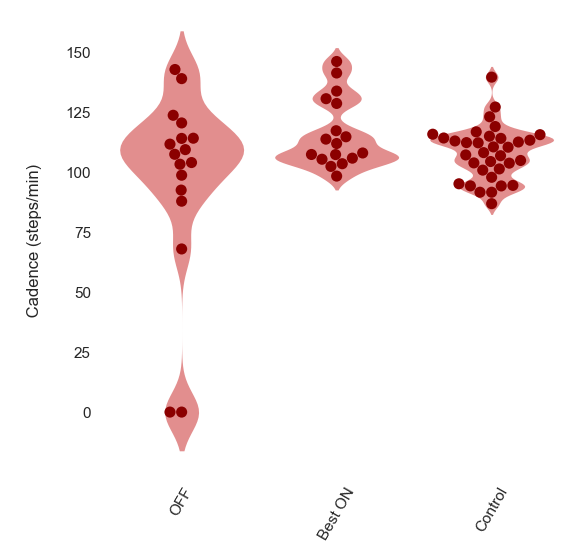

In [53]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Cadence (steps/min)", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Cadence (steps/min)", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Cadence (steps/min) \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# STEP TIME

In [54]:

output_wide_BestON_OFF.groupby("Group").describe()["Step Time - worst side (s)2"]

count      mean       std       min       25%       50%       75%  \
Group                                                                        
BESTON    17.0  0.525436  0.064507  0.412931  0.463232  0.533333  0.579545   
Control   34.0  0.560808  0.057796  0.429325  0.524807  0.549033  0.593836   
OFF       17.0  0.487194  0.204183  0.000000  0.474306  0.540385  0.567187   

              max  
Group              
BESTON   0.616463  
Control  0.690540  
OFF      0.829060

In [55]:
kw_test(output_wide_BestON_OFF,'Group','Step Time - worst side (s)2')

(2.9914,
 '0.2241',
 {'OFF vs. BESTON': ['Step Time - worst side (s)2',
   0.0173,
   '0.4931',
   '1.4793'],
  'OFF vs. Control': ['Step Time - worst side (s)2',
   -1.4021,
   '0.0804',
   '0.2413'],
  'BESTON vs. Control': ['Step Time - worst side (s)2',
   -1.4221,
   '0.0775',
   '0.2325']})

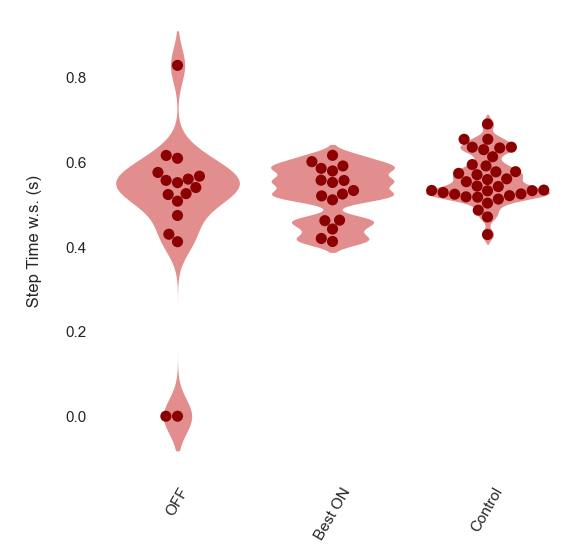

In [56]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Step Time - worst side (s)2", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Step Time - worst side (s)2", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Step Time w.s. (s) \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# STEP LENGTH

In [57]:
output_wide_BestON_OFF.groupby("Group").describe()["Step Length - worst side (m)2"]


count      mean       std       min       25%       50%       75%  \
Group                                                                        
BESTON    17.0  0.489808  0.097939  0.359173  0.403777  0.483714  0.567592   
Control   34.0  0.493441  0.056756  0.366340  0.450200  0.499625  0.527575   
OFF       17.0  0.286123  0.148352  0.000000  0.266526  0.337158  0.365236   

              max  
Group              
BESTON   0.687235  
Control  0.613995  
OFF      0.480193

In [58]:
kw_test(output_wide_BestON_OFF,'Group','Step Length - worst side (m)2')

(29.4392,
 '<.0001',
 {'OFF vs. BESTON': ['Step Length - worst side (m)2',
   -4.2498,
   '<.0001',
   '<.0001'],
  'OFF vs. Control': ['Step Length - worst side (m)2',
   -5.2077,
   '<.0001',
   '<.0001'],
  'BESTON vs. Control': ['Step Length - worst side (m)2',
   -0.3004,
   '0.3819',
   '1.1458']})

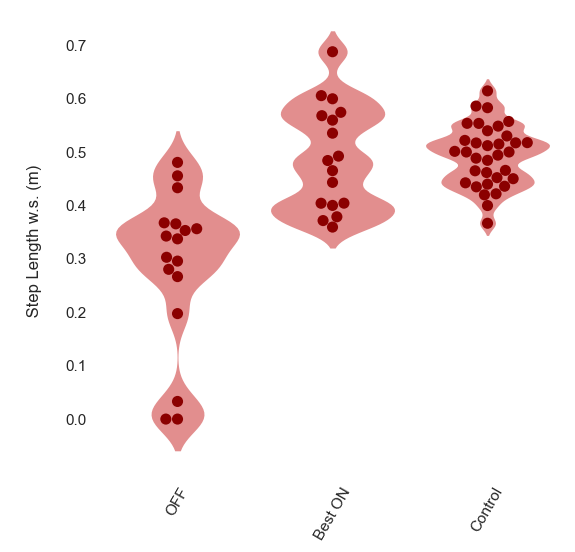

In [59]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Step Length - worst side (m)2", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Step Length - worst side (m)2", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Step Length w.s. (m) \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# STRIDE TIME

In [60]:
output_wide_BestON_OFF.groupby("Group").describe()["Stride Time (s)"]


count      mean       std       min       25%       50%       75%  \
Group                                                                        
BESTON    17.0  1.046943  0.123023  0.820982  0.928308  1.055303  1.130680   
Control   34.0  1.119859  0.117223  0.859680  1.040805  1.097250  1.186343   
OFF       17.0  0.990530  0.422596  0.000000  0.966250  1.074324  1.160833   

              max  
Group              
BESTON   1.246642  
Control  1.405710  
OFF      1.729548

In [61]:
kw_test(output_wide_BestON_OFF,'Group','Stride Time (s)')

(2.7383,
 '0.2543',
 {'OFF vs. BESTON': ['Stride Time (s)', 0.4423, '0.3291', '0.9874'],
  'OFF vs. Control': ['Stride Time (s)', -1.0465, '0.1477', '0.443'],
  'BESTON vs. Control': ['Stride Time (s)', -1.5573, '0.0597', '0.1791']})

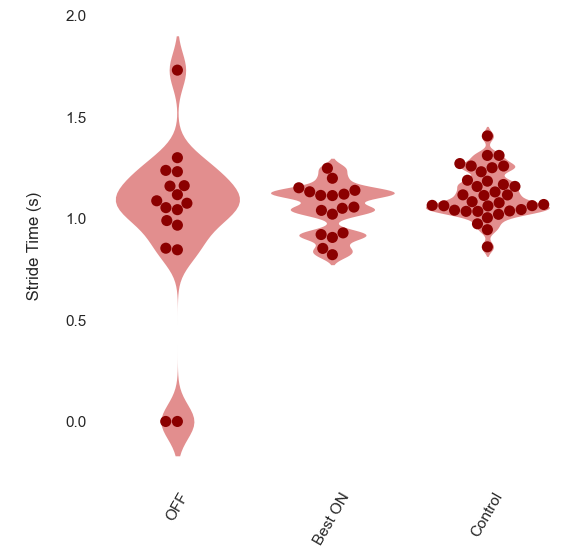

In [62]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Stride Time (s)", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Stride Time (s)", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Stride Time (s) \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# STRIDE LENGTH

In [63]:
output_wide_BestON_OFF.groupby("Group").describe()["Stride Length (m)"]


count      mean       std       min       25%       50%       75%  \
Group                                                                        
BESTON    17.0  0.985536  0.151496  0.770667  0.837313  0.990611  1.057189   
Control   34.0  1.029984  0.107885  0.772470  0.964392  1.040150  1.103240   
OFF       17.0  0.602498  0.302551  0.000000  0.588038  0.650821  0.842926   

              max  
Group              
BESTON   1.302005  
Control  1.273560  
OFF      1.019113

In [64]:
kw_test(output_wide_BestON_OFF,'Group','Stride Length (m)')

(30.8483,
 '<.0001',
 {'OFF vs. BESTON': ['Stride Length (m)', -3.8161, '<.0001', '0.0002'],
  'OFF vs. Control': ['Stride Length (m)', -5.4981, '<.0001', '<.0001'],
  'BESTON vs. Control': ['Stride Length (m)', -1.0916, '0.1375', '0.4125']})

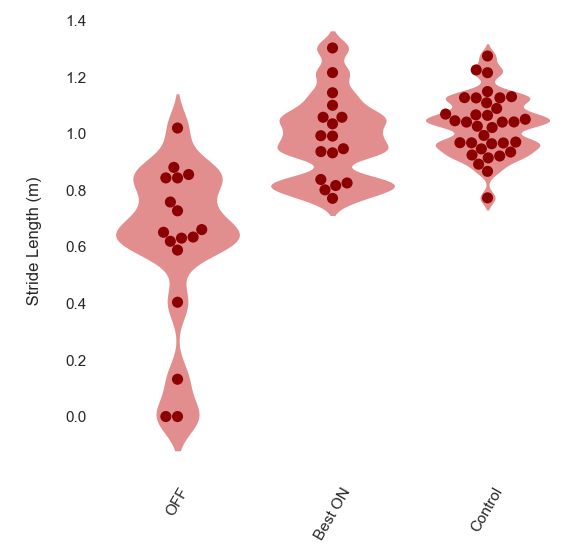

In [65]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Stride Length (m)", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Stride Length (m)", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Stride Length (m) \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# STEP WIDTH

In [66]:
output_wide_BestON_OFF.groupby("Group").describe()["Step Width (m)"]


count      mean       std       min       25%       50%       75%  \
Group                                                                        
BESTON    17.0  0.175859  0.051938  0.130937  0.146254  0.159333  0.183678   
Control   34.0  0.159424  0.008243  0.141960  0.154087  0.161695  0.165247   
OFF       17.0  0.144499  0.069487  0.000000  0.119232  0.148787  0.184698   

              max  
Group              
BESTON   0.325380  
Control  0.179060  
OFF      0.279079

In [67]:
kw_test(output_wide_BestON_OFF,'Group','Step Width (m)')

(0.8655,
 '0.6487',
 {'OFF vs. BESTON': ['Step Width (m)', -0.7979, '0.2125', '0.6374'],
  'OFF vs. Control': ['Step Width (m)', -0.8513, '0.1973', '0.5919'],
  'BESTON vs. Control': ['Step Width (m)', 0.0701, '0.4721', '1.4162']})

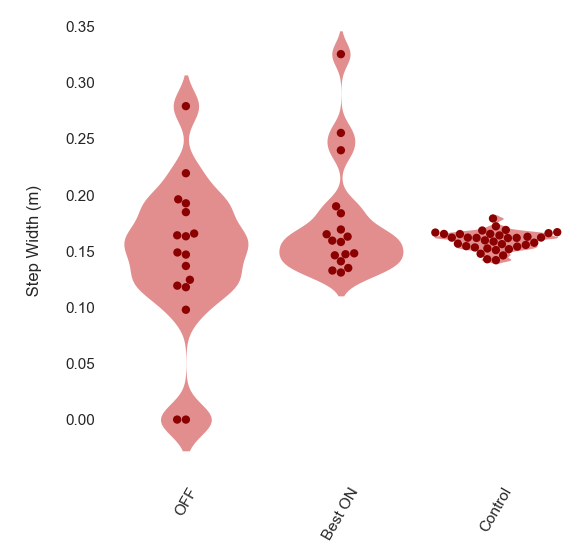

In [69]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Step Width (m)", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Step Width (m)", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 6, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Step Width (m) \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# STANCE FRACTION

In [70]:

output_wide_BestON_OFF.groupby("Group").describe()["Stance Fraction - worst side (% cycle)2"]


count       mean        std        min        25%        50%  \
Group                                                                   
BESTON    17.0  66.130763   1.806307  63.251373  65.699388  66.486175   
Control   34.0  66.631933   1.400148  64.047390  65.674244  66.676568   
OFF       17.0  59.729326  22.889273   0.000000  66.018272  68.530250   

               75%       max  
Group                         
BESTON   66.741032  70.37215  
Control  67.574292  69.33800  
OFF      70.077342  72.28914

In [71]:
kw_test(output_wide_BestON_OFF,'Group','Stance Fraction - worst side (% cycle)2')

(4.6694,
 '0.0968',
 {'OFF vs. BESTON': ['Stance Fraction - worst side (% cycle)2',
   2.1249,
   '0.0168',
   '0.0504'],
  'OFF vs. Control': ['Stance Fraction - worst side (% cycle)2',
   1.5473,
   '0.0609',
   '0.1827'],
  'BESTON vs. Control': ['Stance Fraction - worst side (% cycle)2',
   -0.9063,
   '0.1824',
   '0.5472']})

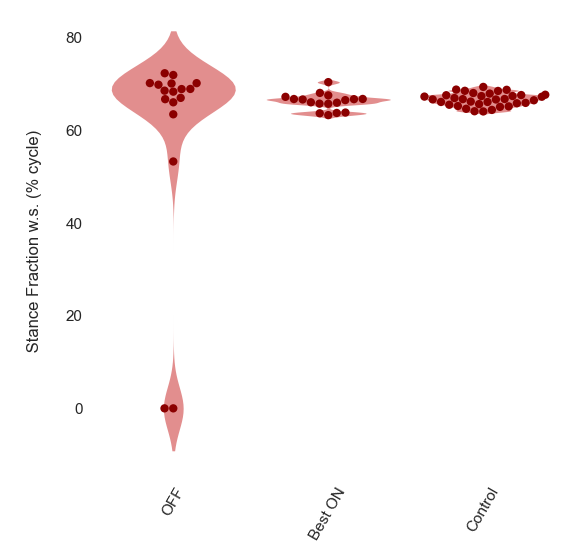

In [72]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Stance Fraction - worst side (% cycle)2", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Stance Fraction - worst side (% cycle)2", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 6, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Stance Fraction w.s. (% cycle) \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# STANCE TIME

In [73]:

output_wide_BestON_OFF.groupby("Group").describe()["Stance Time - worst time t (s)2"]



count      mean       std       min       25%       50%       75%  \
Group                                                                        
BESTON    17.0  0.692131  0.080199  0.519282  0.637540  0.704320  0.745470   
Control   34.0  0.467583  0.143665  0.319710  0.367275  0.404185  0.591674   
OFF       17.0  0.663686  0.270291  0.000000  0.662393  0.731670  0.799289   

              max  
Group              
BESTON   0.798493  
Control  0.754875  
OFF      0.939427

In [74]:
kw_test(output_wide_BestON_OFF,'Group','Stance Time - worst time t (s)2')

(22.5384,
 '<.0001',
 {'OFF vs. BESTON': ['Stance Time - worst time t (s)2',
   -0.0694,
   '0.4723',
   '1.417'],
  'OFF vs. Control': ['Stance Time - worst time t (s)2',
   3.8357,
   '<.0001',
   '0.0002'],
  'BESTON vs. Control': ['Stance Time - worst time t (s)2',
   3.9158,
   '<.0001',
   '0.0001']})

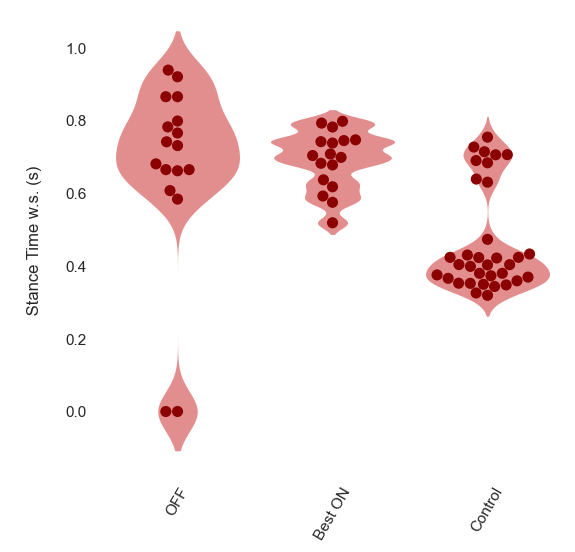

In [78]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Stance Time - worst time t (s)2", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Stance Time - worst time t (s)2", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Stance Time w.s. (s) \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# SWING FRACTION

In [79]:
output_wide_BestON_OFF.groupby("Group").describe()["Swing Fraction - worst side (% cycle)2"]


count       mean        std       min        25%        50%  \
Group                                                                  
BESTON    17.0  33.869237   1.806307  29.62785  33.258968  33.513825   
Control   34.0  33.368067   1.400148  30.66200  32.425708  33.323432   
OFF       17.0  28.505968  11.559706   0.00000  29.833982  31.098419   

               75%        max  
Group                          
BESTON   34.300612  36.748627  
Control  34.325756  35.952610  
OFF      33.026332  46.746248

In [80]:
kw_test(output_wide_BestON_OFF,'Group','Swing Fraction - worst side (% cycle)2')

(12.4242,
 '0.002',
 {'OFF vs. BESTON': ['Swing Fraction - worst side (% cycle)2',
   -3.3044,
   '0.0005',
   '0.0014'],
  'OFF vs. Control': ['Swing Fraction - worst side (% cycle)2',
   -2.9093,
   '0.0018',
   '0.0054'],
  'BESTON vs. Control': ['Swing Fraction - worst side (% cycle)2',
   0.9063,
   '0.1824',
   '0.5472']})

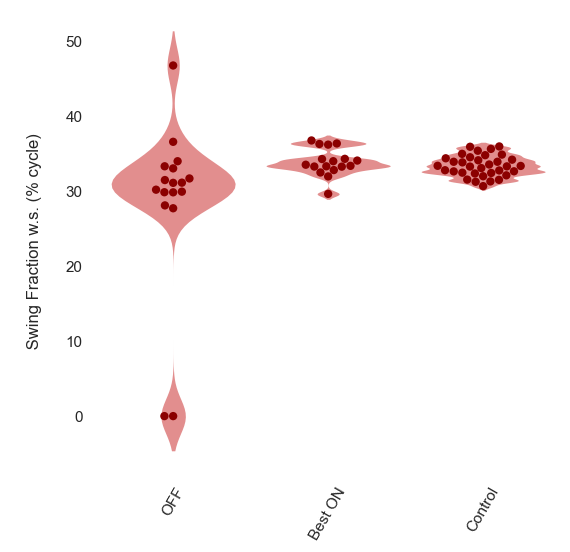

In [139]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Swing Fraction - worst side (% cycle)2", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Swing Fraction - worst side (% cycle)2", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 6, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Swing Fraction w.s. (% cycle) \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# SWING TIME

In [83]:
output_wide_BestON_OFF.groupby("Group").describe()["Swing Time - worst side (s)2"]


count      mean       std       min       25%       50%       75%  \
Group                                                                        
BESTON    17.0  0.354813  0.048104  0.268410  0.335402  0.356117  0.385210   
Control   34.0  0.372844  0.033612  0.299045  0.350139  0.369050  0.394358   
OFF       17.0  0.325140  0.172071  0.000000  0.300732  0.344215  0.369844   

              max  
Group              
BESTON   0.453130  
Control  0.444095  
OFF      0.808499

In [84]:
kw_test(output_wide_BestON_OFF,'Group','Swing Time - worst side (s)2')

(6.3141,
 '0.0426',
 {'OFF vs. BESTON': ['Swing Time - worst side (s)2',
   -1.1535,
   '0.1244',
   '0.3731'],
  'OFF vs. Control': ['Swing Time - worst side (s)2',
   -2.4887,
   '0.0064',
   '0.0192'],
  'BESTON vs. Control': ['Swing Time - worst side (s)2',
   -1.1567,
   '0.1237',
   '0.3711']})

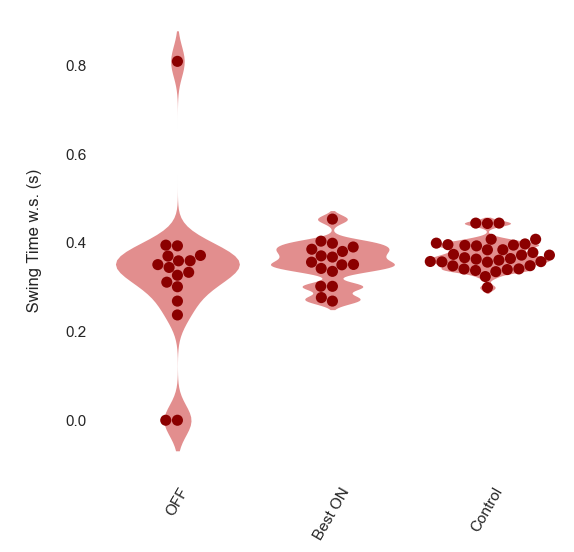

In [137]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Swing Time - worst side (s)2", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Swing Time - worst side (s)2", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Swing Time w.s. (s) \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# DOUBLE SUPPORT (% CYCLE)

In [86]:
output_wide_BestON_OFF.groupby("Group").describe()["Double Support (% cycle)"]


count       mean        std        min        25%        50%  \
Group                                                                   
BESTON    17.0  32.296307   3.075845  27.314622  29.714600  32.284139   
Control   34.0  33.274119   2.664709  28.069360  31.473357  33.194065   
OFF       17.0  32.674755  12.743889   0.000000  32.778563  35.312940   

               75%        max  
Group                          
BESTON   35.369477  36.747085  
Control  35.231315  38.483520  
OFF      39.738045  42.809651

In [87]:
kw_test(output_wide_BestON_OFF,'Group','Double Support (% cycle)')

(6.3882,
 '0.041',
 {'OFF vs. BESTON': ['Double Support (% cycle)', 2.4024, '0.0081', '0.0244'],
  'OFF vs. Control': ['Double Support (% cycle)', 2.028, '0.0213', '0.0638'],
  'BESTON vs. Control': ['Double Support (% cycle)',
   -0.7461,
   '0.2278',
   '0.6834']})

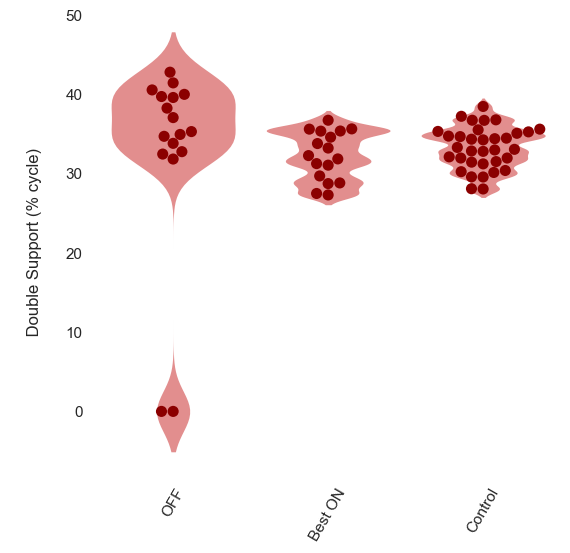

In [136]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Double Support (% cycle)", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Double Support (% cycle)", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Double Support (% cycle) \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# DOUBLE SUPPORT W.S. (% cycle)

In [89]:
output_wide_BestON_OFF.groupby("Group").describe()["Double Support - worst side (% cycle)2"]


count       mean       std        min        25%        50%  \
Group                                                                  
BESTON    17.0  16.318459  1.835692  12.857596  15.585875  16.692171   
Control   34.0  16.637059  1.332355  14.034680  15.736679  16.597033   
OFF       17.0  16.818459  7.077119   0.000000  16.898302  18.200220   

               75%        max  
Group                          
BESTON   17.137339  19.093117  
Control  17.615661  19.241765  
OFF      20.109710  28.759563

In [90]:
kw_test(output_wide_BestON_OFF,'Group','Double Support - worst side (% cycle)2')

(5.5788,
 '0.0615',
 {'OFF vs. BESTON': ['Double Support - worst side (% cycle)2',
   2.1856,
   '0.0144',
   '0.0433'],
  'OFF vs. Control': ['Double Support - worst side (% cycle)2',
   1.9929,
   '0.0231',
   '0.0694'],
  'BESTON vs. Control': ['Double Support - worst side (% cycle)2',
   -0.5308,
   '0.2978',
   '0.8933']})

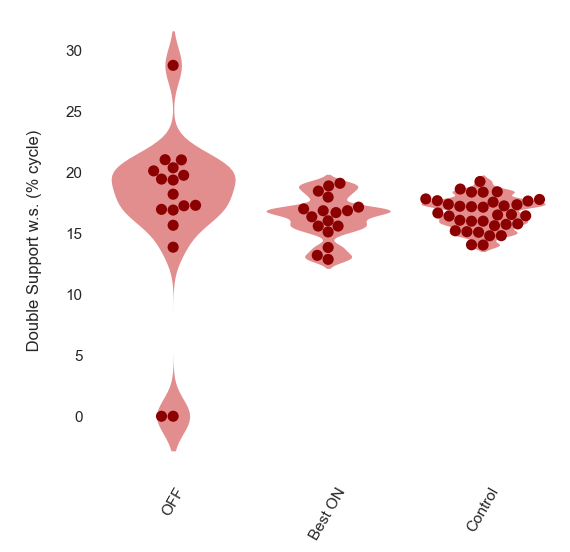

In [135]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Double Support - worst side (% cycle)2", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Double Support - worst side (% cycle)2", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Double Support w.s. (% cycle) \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# DOUBLE SUPPORT W.S. TIME

In [95]:
output_wide_BestON_OFF.groupby("Group").describe()["Double Support Worst Time"]


count      mean       std       min       25%       50%       75%  \
Group                                                                        
BESTON    17.0  0.170945  0.027297  0.108262  0.160288  0.170790  0.185754   
Control   34.0  0.187035  0.029415  0.129615  0.165079  0.183408  0.209395   
OFF       17.0  0.192788  0.107539  0.000000  0.163280  0.178478  0.234734   

              max  
Group              
BESTON   0.219642  
Control  0.250370  
OFF      0.497411

In [96]:
kw_test(output_wide_BestON_OFF,'Group','Double Support Worst Time')

(3.2793,
 '0.1941',
 {'OFF vs. BESTON': ['Double Support Worst Time', 1.5525, '0.0603', '0.1808'],
  'OFF vs. Control': ['Double Support Worst Time', 0.1352, '0.4462', '1.3387'],
  'BESTON vs. Control': ['Double Support Worst Time',
   -1.6574,
   '0.0487',
   '0.1462']})

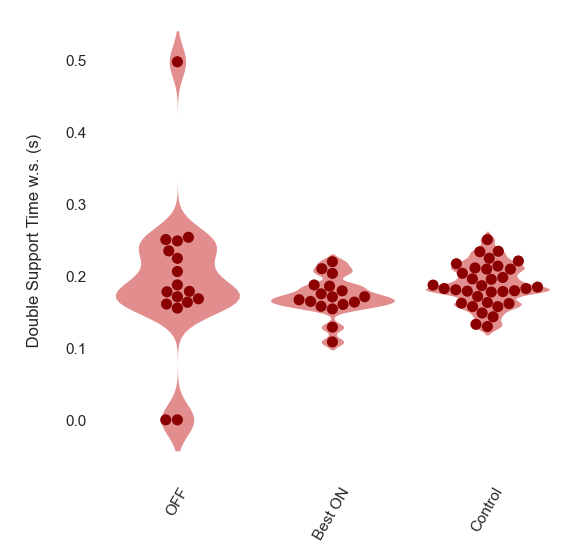

In [134]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Double Support Worst Time", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Double Support Worst Time", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Double Support Time w.s. (s) \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# DOUBLE SUPPORT TIME (S)

In [99]:
output_wide_BestON_OFF.groupby("Group").describe()["Double Support Time (s)"]


count      mean       std       min       25%       50%       75%  \
Group                                                                        
BESTON    17.0  0.338855  0.054589  0.224248  0.319704  0.327947  0.397237   
Control   34.0  0.374070  0.058830  0.259220  0.330157  0.366815  0.418790   
OFF       17.0  0.369945  0.173618  0.000000  0.342160  0.392701  0.443638   

              max  
Group              
BESTON   0.426852  
Control  0.500740  
OFF      0.740414

In [100]:
kw_test(output_wide_BestON_OFF,'Group','Double Support Time (s)')

(4.4968,
 '0.1056',
 {'OFF vs. BESTON': ['Double Support Time (s)', 1.8734, '0.0305', '0.0915'],
  'OFF vs. Control': ['Double Support Time (s)', 0.2704, '0.3934', '1.1803'],
  'BESTON vs. Control': ['Double Support Time (s)',
   -1.8928,
   '0.0292',
   '0.0876']})

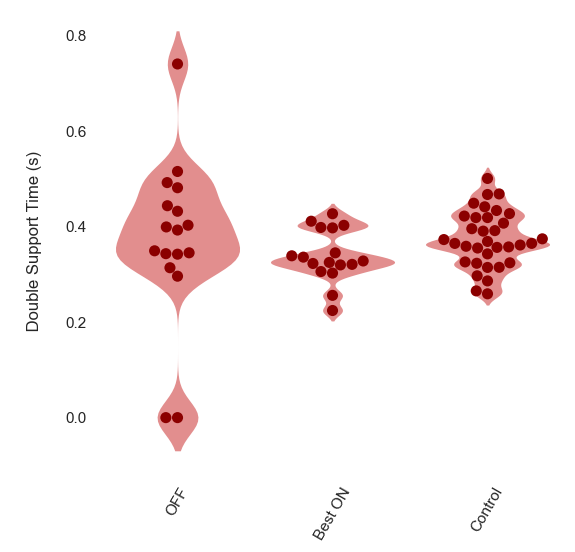

In [133]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Double Support Time (s)", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Double Support Time (s)", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Double Support Time (s) \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# SIGNLE SUPPORT W.S. (% CYCLE)

In [102]:
output_wide_BestON_OFF.groupby("Group").describe()["Single Support - worst side (% cycle)2"]


count       mean        std        min        25%        50%  \
Group                                                                   
BESTON    17.0  33.834456   2.349766  29.270566  32.149246  34.349846   
Control   34.0  33.357815   1.427761  29.442260  32.641337  33.392015   
OFF       17.0  27.054572  11.626735   0.000000  29.801920  31.581605   

               75%        max  
Group                          
BESTON   35.664913  37.893164  
Control  34.257199  36.021655  
OFF      32.673282  36.400138

In [103]:
kw_test(output_wide_BestON_OFF,'Group','Single Support - worst side (% cycle)2')

(10.6074,
 '0.005',
 {'OFF vs. BESTON': ['Single Support - worst side (% cycle)2',
   -3.0269,
   '0.0012',
   '0.0037'],
  'OFF vs. Control': ['Single Support - worst side (% cycle)2',
   -2.729,
   '0.0032',
   '0.0095'],
  'BESTON vs. Control': ['Single Support - worst side (% cycle)2',
   0.7661,
   '0.2218',
   '0.6654']})

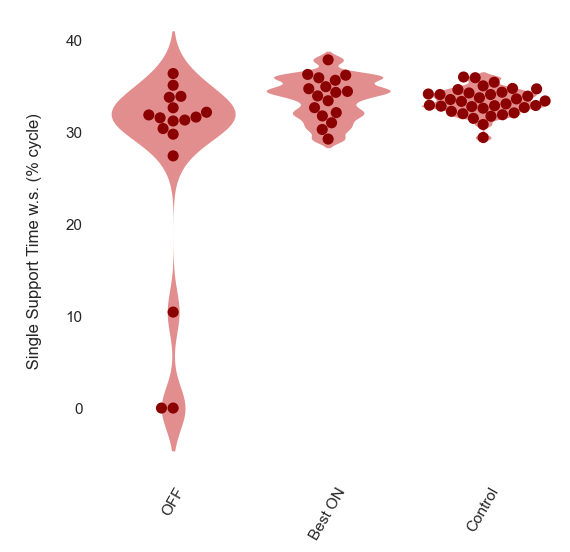

In [132]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Single Support - worst side (% cycle)2", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Single Support - worst side (% cycle)2", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Single Support Time w.s. (% cycle) \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# SINGLE SUPPORT TIME W.S.

In [107]:
output_wide_BestON_OFF.groupby("Group").describe()["Single Support Time - worst side"]


count      mean       std       min       25%       50%       75%  \
Group                                                                        
BESTON    17.0  0.353275  0.041273  0.272973  0.327534  0.358009  0.384672   
Control   34.0  0.372946  0.036420  0.301410  0.348949  0.367285  0.396616   
OFF       17.0  0.295446  0.125164  0.000000  0.288400  0.339289  0.357015   

              max  
Group              
BESTON   0.421683  
Control  0.461730  
OFF      0.434136

In [108]:
kw_test(output_wide_BestON_OFF,'Group','Single Support Time - worst side')

(9.222,
 '0.0099',
 {'OFF vs. BESTON': ['Single Support Time - worst side',
   -1.3443,
   '0.0894',
   '0.2683'],
  'OFF vs. Control': ['Single Support Time - worst side',
   -2.9994,
   '0.0014',
   '0.0041'],
  'BESTON vs. Control': ['Single Support Time - worst side',
   -1.4471,
   '0.0739',
   '0.2218']})

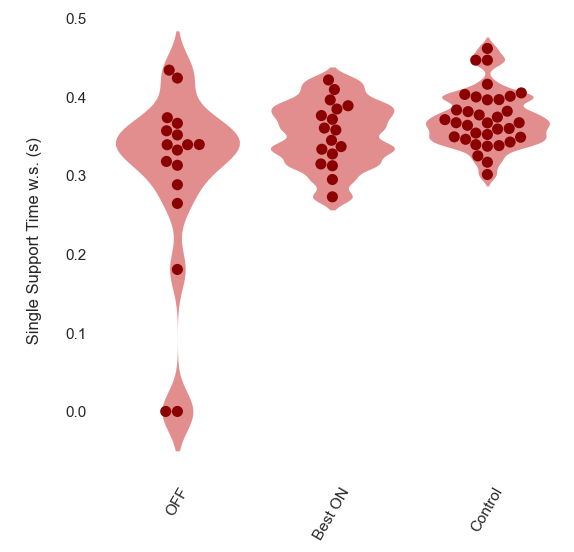

In [131]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Single Support Time - worst side", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Single Support Time - worst side", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Single Support Time w.s. (s) \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# HIP FLEXION ROM W.S.

In [111]:
output_wide_BestON_OFF.groupby("Group").describe()["hip_flexion_rom_worstside"]


count       mean        std       min       25%       50%        75%  \
Group                                                                           
BESTON    17.0  36.000169   8.268638  22.19413  29.52512  37.15308  39.502400   
Control   34.0  38.112327   4.469029  28.09048  34.69801  38.07062  40.557048   
OFF       17.0  24.066268  11.662239   0.00000  18.66868  26.50311  31.830760   

              max  
Group              
BESTON   54.14569  
Control  47.58397  
OFF      38.29841

In [112]:
kw_test(output_wide_BestON_OFF,'Group','hip_flexion_rom_worstside')

(23.3463,
 '<.0001',
 {'OFF vs. BESTON': ['hip_flexion_rom_worstside', -3.0876, '0.001', '0.003'],
  'OFF vs. Control': ['hip_flexion_rom_worstside',
   -4.8171,
   '<.0001',
   '<.0001'],
  'BESTON vs. Control': ['hip_flexion_rom_worstside',
   -1.2518,
   '0.1053',
   '0.316']})

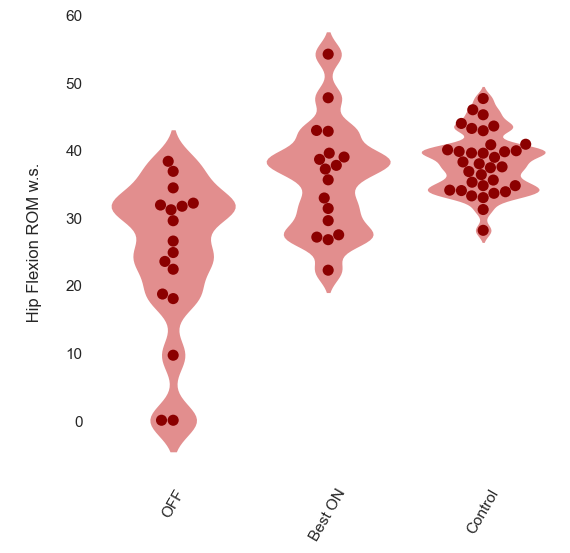

In [130]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="hip_flexion_rom_worstside", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "hip_flexion_rom_worstside", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Hip Flexion ROM w.s. \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# HIP ADDUCTION ROM W.S.

In [114]:
output_wide_BestON_OFF.groupby("Group").describe()["hip_adduction_rom_worstside"]


count       mean       std       min       25%        50%        75%  \
Group                                                                           
BESTON    17.0  13.005534  2.387099  7.815980  12.23108  13.115650  14.322110   
Control   34.0  16.447359  4.981165  8.159155  12.86221  16.662973  19.671055   
OFF       17.0   8.593542  5.161535  0.000000   4.23758  10.439450  12.515670   

               max  
Group               
BESTON   17.694210  
Control  28.828375  
OFF      18.049250

In [115]:
kw_test(output_wide_BestON_OFF,'Group','hip_adduction_rom_worstside')

(22.143,
 '<.0001',
 {'OFF vs. BESTON': ['hip_adduction_rom_worstside',
   -2.203,
   '0.0138',
   '0.0414'],
  'OFF vs. Control': ['hip_adduction_rom_worstside',
   -4.6669,
   '<.0001',
   '<.0001'],
  'BESTON vs. Control': ['hip_adduction_rom_worstside',
   -2.1231,
   '0.0169',
   '0.0506']})

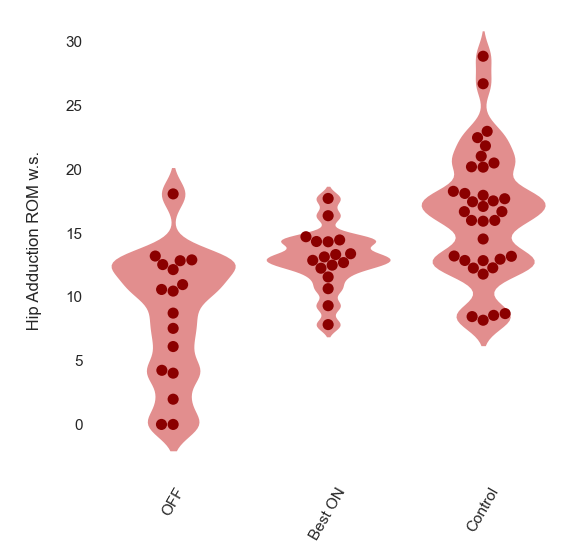

In [129]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="hip_adduction_rom_worstside", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "hip_adduction_rom_worstside", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Hip Adduction ROM w.s. \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# HIP ROTATION ROM W.S.

In [117]:
output_wide_BestON_OFF.groupby("Group").describe()["hip_rotation_rom_worstside"]


count       mean       std        min        25%        50%  \
Group                                                                  
BESTON    17.0  16.406386  3.628460  12.358120  13.506160  15.145770   
Control   34.0  14.820995  2.892285  11.045945  12.520312  14.667347   
OFF       17.0  10.004804  6.109658   0.000000   7.265820   9.881220   

               75%       max  
Group                         
BESTON   19.420800  23.72818  
Control  15.917791  23.27859  
OFF      11.925740  25.70762

In [118]:
kw_test(output_wide_BestON_OFF,'Group','hip_rotation_rom_worstside')

(19.6143,
 '<.0001',
 {'OFF vs. BESTON': ['hip_rotation_rom_worstside',
   -4.1457,
   '<.0001',
   '<.0001'],
  'OFF vs. Control': ['hip_rotation_rom_worstside',
   -3.6654,
   '0.0001',
   '0.0004'],
  'BESTON vs. Control': ['hip_rotation_rom_worstside',
   1.1217,
   '0.131',
   '0.393']})

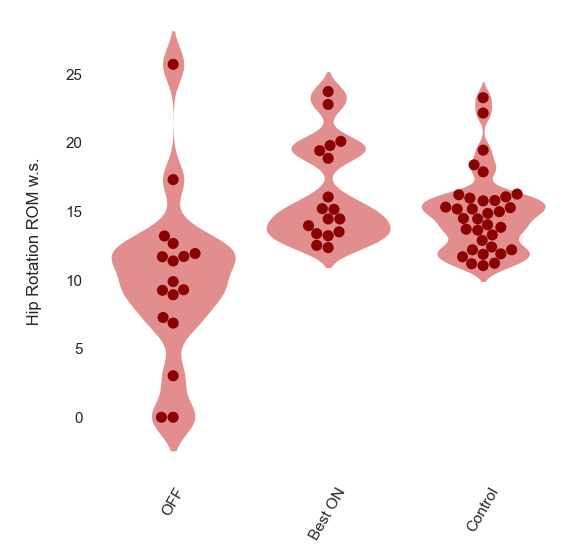

In [128]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="hip_rotation_rom_worstside", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "hip_rotation_rom_worstside", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Hip Rotation ROM w.s. \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# KNEE ANGLE ROM W.S.

In [120]:
output_wide_BestON_OFF.groupby("Group").describe()["knee_angle_rom_worstside"]


count       mean        std        min        25%        50%  \
Group                                                                   
BESTON    17.0  50.330586  13.305891  20.877140  43.821010  55.504620   
Control   34.0  57.804317   6.469060  44.427745  53.518175  56.576625   
OFF       17.0  40.843345  24.531870   0.000000  32.303340  39.986690   

               75%        max  
Group                          
BESTON   60.731280   63.77186  
Control  63.670719   70.22765  
OFF      48.839990  108.81234

In [121]:
kw_test(output_wide_BestON_OFF,'Group','knee_angle_rom_worstside')

(17.2119,
 '0.0002',
 {'OFF vs. BESTON': ['knee_angle_rom_worstside', -2.0295, '0.0212', '0.0636'],
  'OFF vs. Control': ['knee_angle_rom_worstside', -4.1261, '<.0001', '<.0001'],
  'BESTON vs. Control': ['knee_angle_rom_worstside',
   -1.7826,
   '0.0373',
   '0.112']})

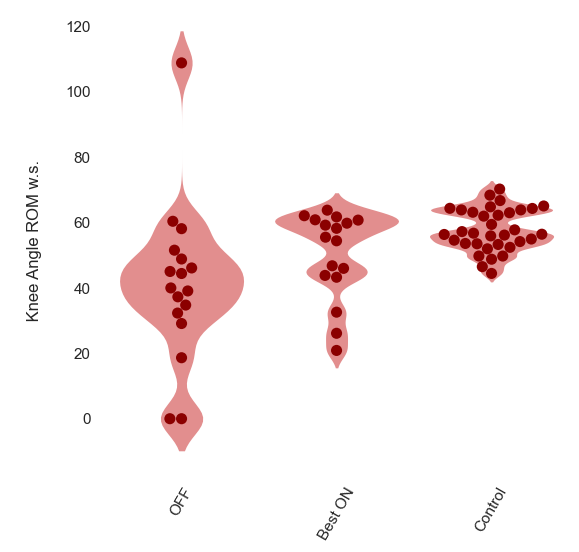

In [127]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="knee_angle_rom_worstside", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "knee_angle_rom_worstside", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Knee Angle ROM w.s. \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# ANKLE ANGLE ROM W.S. 

In [123]:
output_wide_BestON_OFF.groupby("Group").describe()["ankle_angle_rom_worstside"]


count       mean        std        min        25%       50%  \
Group                                                                  
BESTON    17.0  34.329569   9.351572  21.208420  30.291330  32.69118   
Control   34.0  34.810693   6.859929  22.700755  29.808986  34.73866   
OFF       17.0  24.234915  15.947120   0.000000  12.537060  24.13005   

               75%       max  
Group                         
BESTON   37.656400  57.63206  
Control  38.416493  49.73388  
OFF      33.724390  56.61877

In [124]:
kw_test(output_wide_BestON_OFF,'Group','ankle_angle_rom_worstside')

(8.0188,
 '0.0181',
 {'OFF vs. BESTON': ['ankle_angle_rom_worstside', -2.0295, '0.0212', '0.0636'],
  'OFF vs. Control': ['ankle_angle_rom_worstside',
   -2.7841,
   '0.0027',
   '0.0081'],
  'BESTON vs. Control': ['ankle_angle_rom_worstside',
   -0.4407,
   '0.3297',
   '0.9891']})

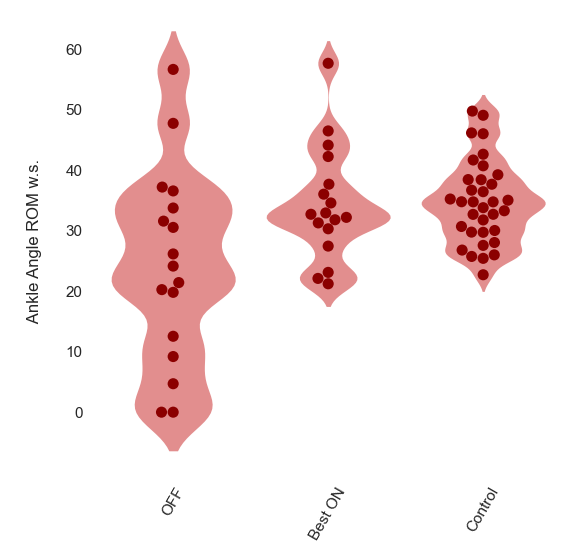

In [126]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="ankle_angle_rom_worstside", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "ankle_angle_rom_worstside", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Ankle Angle ROM w.s. \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# HIP FLEXION MEAN VELOCITY W.S.

In [140]:
output_wide_BestON_OFF.groupby("Group").describe()["hip_flexion_mean_vel_worstside"]


count       mean        std        min       25%        50%  \
Group                                                                  
BESTON    17.0  68.756735  20.190740  37.679960  53.02994  66.189730   
Control   34.0  68.106533  12.763698  47.478895  59.18894  67.703115   
OFF       17.0  44.765554  21.691863   0.000000  39.10316  49.935830   

               75%        max  
Group                          
BESTON   77.448110  114.89547  
Control  75.483367  107.85741  
OFF      55.223710   77.01875

In [141]:
kw_test(output_wide_BestON_OFF,'Group','hip_flexion_mean_vel_worstside')

(16.1055,
 '0.0003',
 {'OFF vs. BESTON': ['hip_flexion_mean_vel_worstside',
   -3.0876,
   '0.001',
   '0.003'],
  'OFF vs. Control': ['hip_flexion_mean_vel_worstside',
   -3.8757,
   '<.0001',
   '0.0002'],
  'BESTON vs. Control': ['hip_flexion_mean_vel_worstside',
   -0.3105,
   '0.3781',
   '1.1343']})

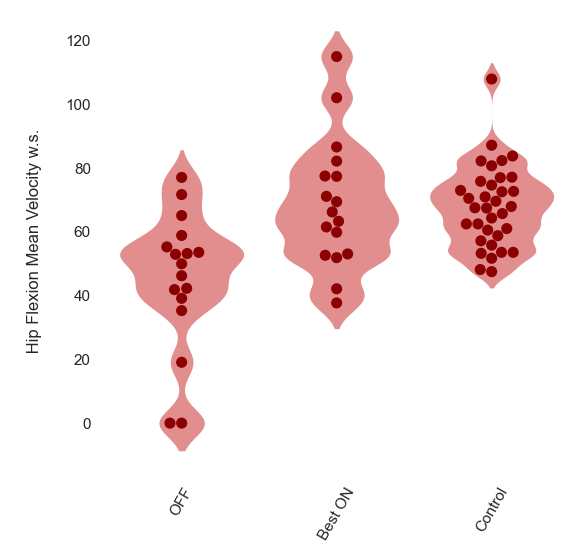

In [142]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="hip_flexion_mean_vel_worstside", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "hip_flexion_mean_vel_worstside", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Hip Flexion Mean Velocity w.s. \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# HIP ADDUCTION MEAN VELOCITY W.S.

In [143]:
output_wide_BestON_OFF.groupby("Group").describe()["hip_adduction_mean_vel_worstside"]


count       mean        std       min        25%       50%  \
Group                                                                 
BESTON    17.0  26.813960   5.449743  18.34265  22.625200  26.73369   
Control   34.0  29.934874   8.818873  16.19824  24.050348  28.79988   
OFF       17.0  16.732552  10.054104   0.00000   8.116720  18.66962   

               75%       max  
Group                         
BESTON   29.571730  36.98841  
Control  33.902554  50.97150  
OFF      22.771520  32.40617

In [ ]:
output_wide_BestON_OFF.groupby("Group").describe()["hip_adduction_mean_vel_worstside"]


count       mean        std       min        25%       50%  \
Group                                                                 
BESTON    17.0  26.813960   5.449743  18.34265  22.625200  26.73369   
Control   34.0  29.934874   8.818873  16.19824  24.050348  28.79988   
OFF       17.0  16.732552  10.054104   0.00000   8.116720  18.66962   

               75%       max  
Group                         
BESTON   29.571730  36.98841  
Control  33.902554  50.97150  
OFF      22.771520  32.40617

In [144]:
kw_test(output_wide_BestON_OFF,'Group','hip_adduction_mean_vel_worstside')

(16.4476,
 '0.0003',
 {'OFF vs. BESTON': ['hip_adduction_mean_vel_worstside',
   -2.7233,
   '0.0032',
   '0.0097'],
  'OFF vs. Control': ['hip_adduction_mean_vel_worstside',
   -4.0259,
   '<.0001',
   '<.0001'],
  'BESTON vs. Control': ['hip_adduction_mean_vel_worstside',
   -0.8813,
   '0.1891',
   '0.5672']})

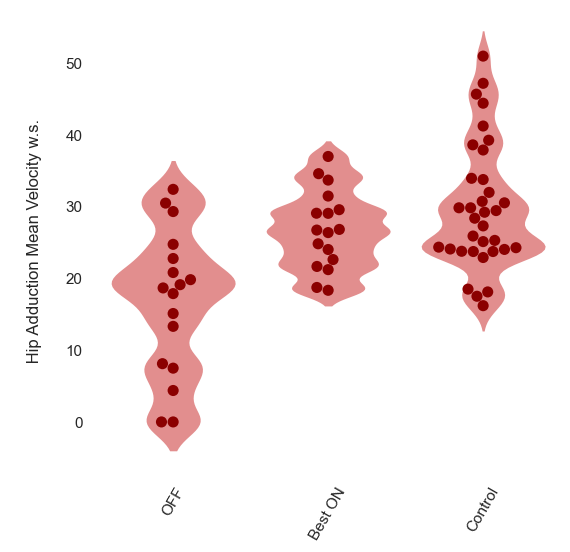

In [145]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="hip_adduction_mean_vel_worstside", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "hip_adduction_mean_vel_worstside", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Hip Adduction Mean Velocity w.s. \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# HIP ROTATION MEAN VELOCITY W.S.

In [146]:
output_wide_BestON_OFF.groupby("Group").describe()["hip_rotation_mean_vel_worstside"]


count       mean       std       min        25%       50%        75%  \
Group                                                                           
BESTON    17.0  35.816253  8.524289  22.91829  29.794170  34.33789  42.848270   
Control   34.0  31.098824  7.151887  20.60898  26.006485  29.05217  33.039779   
OFF       17.0  19.787260  9.566148   0.00000  15.552310  21.33507  25.707620   

              max  
Group              
BESTON   52.63625  
Control  47.97783  
OFF      31.37413

In [147]:
kw_test(output_wide_BestON_OFF,'Group','hip_rotation_mean_vel_worstside')

(24.8399,
 '<.0001',
 {'OFF vs. BESTON': ['hip_rotation_mean_vel_worstside',
   -4.8656,
   '<.0001',
   '<.0001'],
  'OFF vs. Control': ['hip_rotation_mean_vel_worstside',
   -3.6904,
   '0.0001',
   '0.0003'],
  'BESTON vs. Control': ['hip_rotation_mean_vel_worstside',
   1.9278,
   '0.0269',
   '0.0808']})

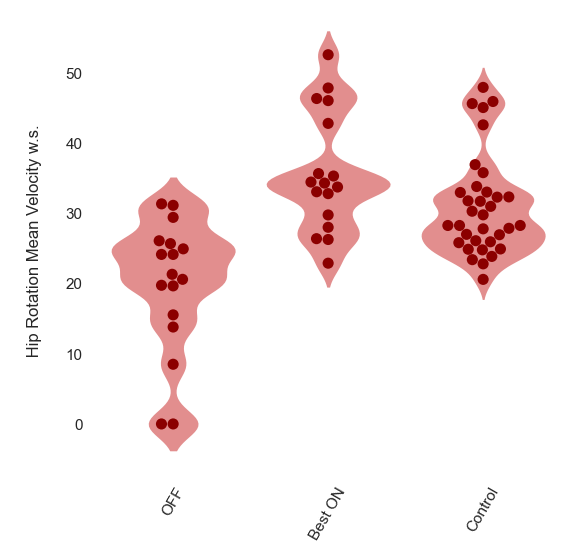

In [148]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="hip_rotation_mean_vel_worstside", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "hip_rotation_mean_vel_worstside", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Hip Rotation Mean Velocity w.s. \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

In [ ]:
output_wide_BestON_OFF.groupby("Group").describe()["hip_adduction_mean_vel_worstside"]


count       mean        std       min        25%       50%  \
Group                                                                 
BESTON    17.0  26.813960   5.449743  18.34265  22.625200  26.73369   
Control   34.0  29.934874   8.818873  16.19824  24.050348  28.79988   
OFF       17.0  16.732552  10.054104   0.00000   8.116720  18.66962   

               75%       max  
Group                         
BESTON   29.571730  36.98841  
Control  33.902554  50.97150  
OFF      22.771520  32.40617

# KNEE ANGLE MEAN VELOCITY W.S.

In [149]:
output_wide_BestON_OFF.groupby("Group").describe()["knee_angle_r_mean_vel_worstside"]

count        mean        std       min         25%         50%  \
Group                                                                     
BESTON    17.0  111.126323  32.873566  55.81027   86.311180  120.244880   
Control   34.0  118.169229  18.534579  90.37781  102.202975  117.903762   
OFF       17.0   79.294195  38.726204   0.00000   64.259690   91.495720   

                75%        max  
Group                           
BESTON   129.969930  169.90147  
Control  130.246571  159.58990  
OFF       98.351770  140.27909

In [150]:
kw_test(output_wide_BestON_OFF,'Group','knee_angle_r_mean_vel_worstside')

(13.6757,
 '0.0011',
 {'OFF vs. BESTON': ['knee_angle_r_mean_vel_worstside',
   -2.3764,
   '0.0087',
   '0.0262'],
  'OFF vs. Control': ['knee_angle_r_mean_vel_worstside',
   -3.6854,
   '0.0001',
   '0.0003'],
  'BESTON vs. Control': ['knee_angle_r_mean_vel_worstside',
   -0.9414,
   '0.1732',
   '0.5197']})

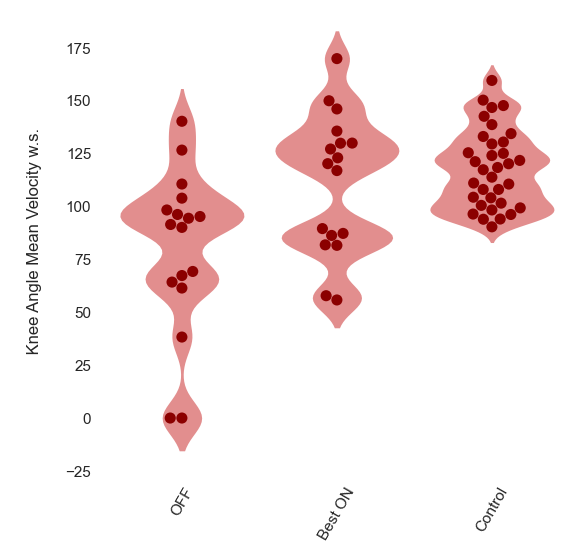

In [151]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="knee_angle_r_mean_vel_worstside", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "knee_angle_r_mean_vel_worstside", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Knee Angle Mean Velocity w.s. \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# ANKLE ANGLE MEAN VELOCITY W.S.

In [152]:
output_wide_BestON_OFF.groupby("Group").describe()["ankle_angle_mean_vel_worstside"]

count       mean        std       min        25%        50%  \
Group                                                                  
BESTON    17.0  69.954581  17.781206  37.21204  60.488190  69.212920   
Control   34.0  73.495956  16.192153  42.65196  65.574183  74.404815   
OFF       17.0  48.866160  28.430923   0.00000  37.502430  41.532610   

               75%        max  
Group                          
BESTON   80.639150  101.02349  
Control  80.784829  103.35818  
OFF      69.056000  100.84929

In [153]:
kw_test(output_wide_BestON_OFF,'Group','ankle_angle_mean_vel_worstside')

(11.5877,
 '0.003',
 {'OFF vs. BESTON': ['ankle_angle_mean_vel_worstside',
   -2.281,
   '0.0113',
   '0.0338'],
  'OFF vs. Control': ['ankle_angle_mean_vel_worstside',
   -3.38,
   '0.0004',
   '0.0011'],
  'BESTON vs. Control': ['ankle_angle_mean_vel_worstside',
   -0.7461,
   '0.2278',
   '0.6834']})

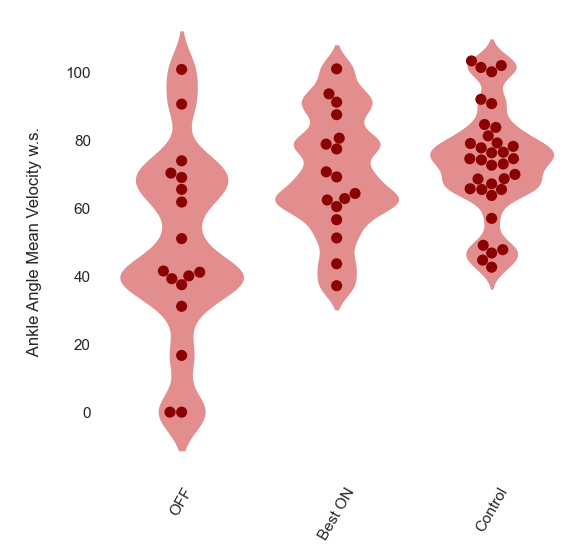

In [154]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="ankle_angle_mean_vel_worstside", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "ankle_angle_mean_vel_worstside", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Ankle Angle Mean Velocity w.s. \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# ARM FLEXION ROM W.S.

In [155]:
output_wide_BestON_OFF.groupby("Group").describe()["arm_flex_rom_worstside"]

count       mean        std      min        25%       50%        75%  \
Group                                                                           
BESTON    17.0  24.044260  14.357665  7.74607  13.840570  22.83057  31.686820   
Control   34.0  16.374767   5.578628  5.62371  12.987133  17.20246  19.678503   
OFF       17.0   6.625785   5.372112  0.00000   3.319230   6.74897   7.912690   

               max  
Group               
BESTON   57.808350  
Control  27.582795  
OFF      19.813460

In [156]:
kw_test(output_wide_BestON_OFF,'Group','arm_flex_rom_worstside')

(26.1211,
 '<.0001',
 {'OFF vs. BESTON': ['arm_flex_rom_worstside', -4.8309, '<.0001', '<.0001'],
  'OFF vs. Control': ['arm_flex_rom_worstside', -4.1511, '<.0001', '<.0001'],
  'BESTON vs. Control': ['arm_flex_rom_worstside',
   1.4271,
   '0.0768',
   '0.2303']})

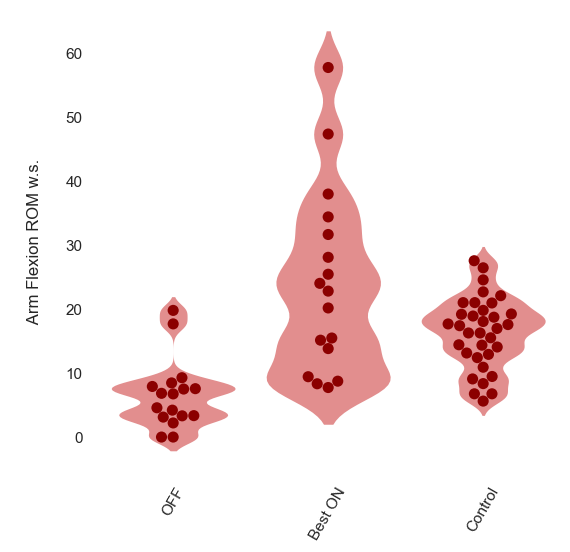

In [157]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="arm_flex_rom_worstside", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "arm_flex_rom_worstside", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Arm Flexion ROM w.s. \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# ARM ADDUCTION ROM W.S.

In [158]:
output_wide_BestON_OFF.groupby("Group").describe()["arm_add_rom_worstside"]

count       mean       std       min       25%       50%        75%  \
Group                                                                          
BESTON    17.0  10.656044  5.172366  3.665420  7.609590  9.256800  12.363860   
Control   34.0   7.502129  2.310504  3.883075  6.030912  6.742715   9.181809   
OFF       17.0   4.186611  2.329045  0.000000  2.885430  4.744826   4.938790   

              max  
Group              
BESTON   24.33215  
Control  13.02330  
OFF       7.95686

In [159]:
kw_test(output_wide_BestON_OFF,'Group','arm_add_rom_worstside')

(22.6654,
 '<.0001',
 {'OFF vs. BESTON': ['arm_add_rom_worstside', -4.6661, '<.0001', '<.0001'],
  'OFF vs. Control': ['arm_add_rom_worstside', -3.4651, '0.0003', '0.0008'],
  'BESTON vs. Control': ['arm_add_rom_worstside', 1.9228, '0.0273', '0.0818']})

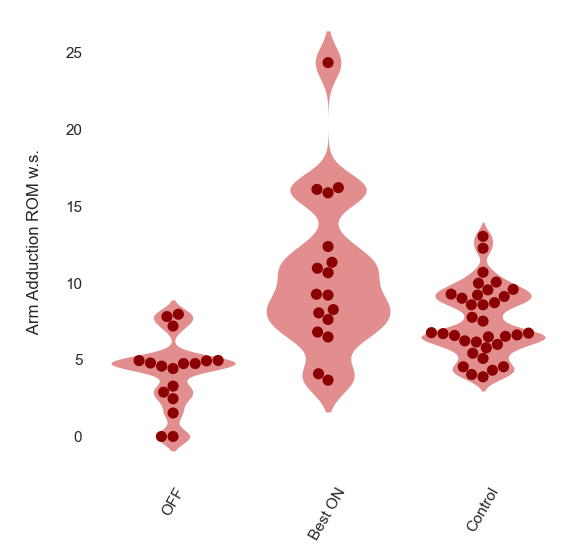

In [160]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="arm_add_rom_worstside", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "arm_add_rom_worstside", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Arm Adduction ROM w.s. \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# ELBOW FLEXION ROM W.S.

In [161]:
output_wide_BestON_OFF.groupby("Group").describe()["elbow_flex_rom_worstside"]

count       mean       std       min        25%        50%       75%  \
Group                                                                           
BESTON    17.0  19.302219  9.642567   6.79998  12.599050  17.785730  22.15730   
Control   34.0  20.491106  8.769274  10.44760  14.049149  18.535438  25.52567   
OFF       17.0   7.002533  5.678069   0.00000   4.408090   5.713610   7.89672   

               max  
Group               
BESTON   42.385160  
Control  45.159255  
OFF      21.062540

In [162]:
kw_test(output_wide_BestON_OFF,'Group','elbow_flex_rom_worstside')

(26.4757,
 '<.0001',
 {'OFF vs. BESTON': ['elbow_flex_rom_worstside', -3.8855, '<.0001', '0.0002'],
  'OFF vs. Control': ['elbow_flex_rom_worstside', -4.9974, '<.0001', '<.0001'],
  'BESTON vs. Control': ['elbow_flex_rom_worstside',
   -0.5108,
   '0.3047',
   '0.9142']})

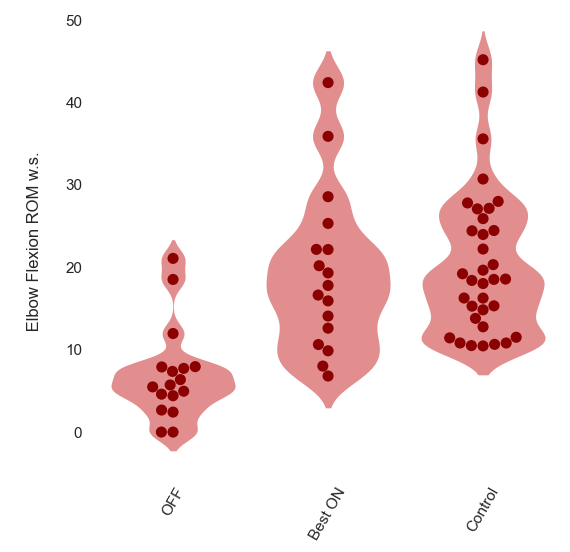

In [166]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="elbow_flex_rom_worstside", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "elbow_flex_rom_worstside", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Elbow Flexion ROM w.s. \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# ARM ROTATION ROM W.S.

In [164]:
output_wide_BestON_OFF.groupby("Group").describe()["arm_rot_rom_worstside"]

count       mean        std      min        25%        50%  \
Group                                                                 
BESTON    17.0  19.283421  12.072382  5.49176  11.433800  16.120210   
Control   34.0  18.932604   7.202078  7.95068  13.266672  18.197677   
OFF       17.0   7.335340   6.198391  0.00000   3.328610   4.751630   

               75%        max  
Group                          
BESTON   22.983760  47.528450  
Control  23.310429  38.123775  
OFF      10.563740  22.184720

In [165]:
kw_test(output_wide_BestON_OFF,'Group','arm_rot_rom_worstside')

(22.2489,
 '<.0001',
 {'OFF vs. BESTON': ['arm_rot_rom_worstside', -3.4866, '0.0002', '0.0007'],
  'OFF vs. Control': ['arm_rot_rom_worstside', -4.6068, '<.0001', '<.0001'],
  'BESTON vs. Control': ['arm_rot_rom_worstside', -0.5809, '0.2807', '0.842']})

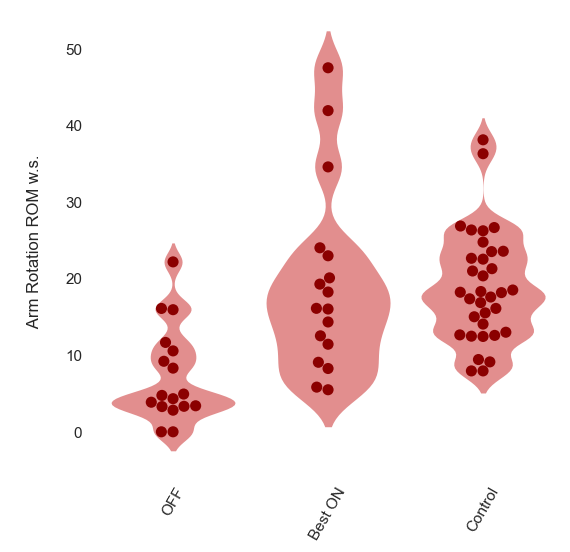

In [167]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="arm_rot_rom_worstside", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "arm_rot_rom_worstside", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Arm Rotation ROM w.s. \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# PRONATION SUPINATION ROM W.S.

In [168]:
output_wide_BestON_OFF.groupby("Group").describe()["pro_sup_rom_worstside"]

count       mean        std       min        25%        50%  \
Group                                                                  
BESTON    17.0  20.264540  11.450001  8.521180  13.216960  15.519230   
Control   34.0  16.561921   8.138366  6.722845  10.763234  14.373522   
OFF       17.0   6.469085   4.339451  0.000000   4.177700   7.157090   

              75%        max  
Group                         
BESTON   21.72638  45.332720  
Control  18.92332  40.836375  
OFF       8.96433  13.813580

In [169]:
kw_test(output_wide_BestON_OFF,'Group','pro_sup_rom_worstside')

(27.3206,
 '<.0001',
 {'OFF vs. BESTON': ['pro_sup_rom_worstside', -4.7875, '<.0001', '<.0001'],
  'OFF vs. Control': ['pro_sup_rom_worstside', -4.4766, '<.0001', '<.0001'],
  'BESTON vs. Control': ['pro_sup_rom_worstside', 1.0516, '0.1465', '0.4395']})

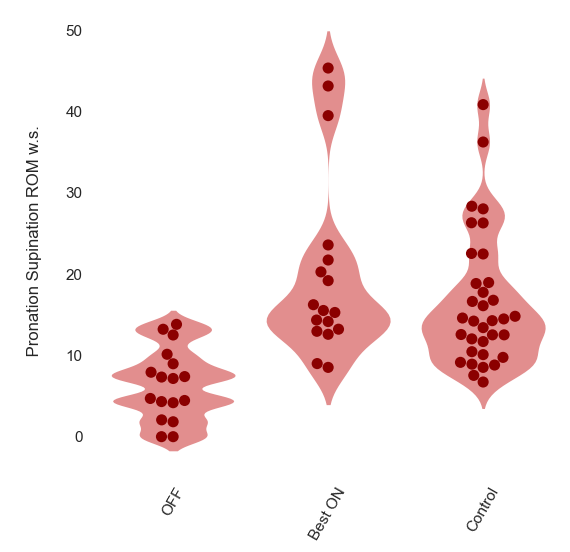

In [170]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="pro_sup_rom_worstside", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "pro_sup_rom_worstside", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Pronation Supination ROM w.s. \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# WRIST FLEXION ROM W.S.

In [171]:
output_wide_BestON_OFF.groupby("Group").describe()["wrist_flex_rom_worstside"]

count       mean        std       min       25%       50%       75%  \
Group                                                                          
BESTON    17.0  20.215244  13.240097  4.713770  9.257490  17.98990  28.47896   
Control   34.0  12.059554   5.051273  5.151055  7.860708  10.76086  15.97737   
OFF       17.0   5.587428   3.558433  0.000000  3.249840   5.15160   8.23172   

              max  
Group              
BESTON   49.83102  
Control  22.04645  
OFF      11.98388

In [172]:
kw_test(output_wide_BestON_OFF,'Group','wrist_flex_rom_worstside')

(24.0985,
 '<.0001',
 {'OFF vs. BESTON': ['wrist_flex_rom_worstside', -4.7268, '<.0001', '<.0001'],
  'OFF vs. Control': ['wrist_flex_rom_worstside', -3.8106, '<.0001', '0.0002'],
  'BESTON vs. Control': ['wrist_flex_rom_worstside',
   1.6474,
   '0.0497',
   '0.1492']})

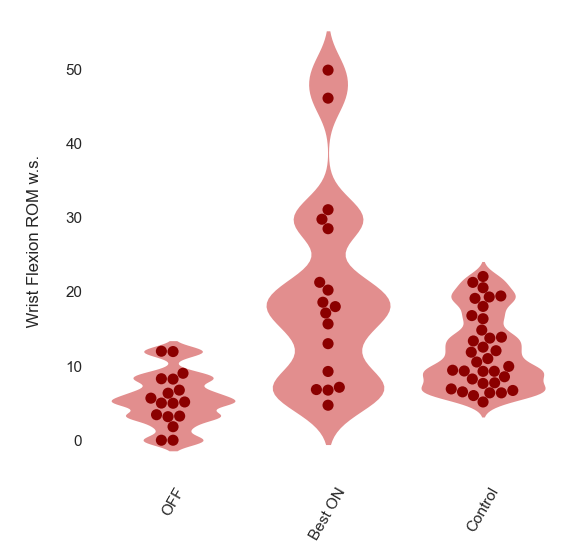

In [173]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="wrist_flex_rom_worstside", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "wrist_flex_rom_worstside", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Wrist Flexion ROM w.s. \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# WRIST DEVIATION ROM W.S.

In [174]:
output_wide_BestON_OFF.groupby("Group").describe()["wrist_dev_rom_worstside"]

count       mean       std      min       25%        50%        75%  \
Group                                                                          
BESTON    17.0  14.045655  8.309461  4.52022  8.362210  14.045655  17.361210   
Control   34.0  11.545717  6.903732  4.50060  7.128082   8.950585  15.157642   
OFF       17.0   4.165396  3.391985  0.00000  2.507140   3.712050   4.720782   

              max  
Group              
BESTON   35.33696  
Control  33.33076  
OFF      12.17002

In [175]:
kw_test(output_wide_BestON_OFF,'Group','wrist_dev_rom_worstside')

(25.536,
 '<.0001',
 {'OFF vs. BESTON': ['wrist_dev_rom_worstside', -4.5273, '<.0001', '<.0001'],
  'OFF vs. Control': ['wrist_dev_rom_worstside', -4.4466, '<.0001', '<.0001'],
  'BESTON vs. Control': ['wrist_dev_rom_worstside',
   0.7812,
   '0.2173',
   '0.652']})

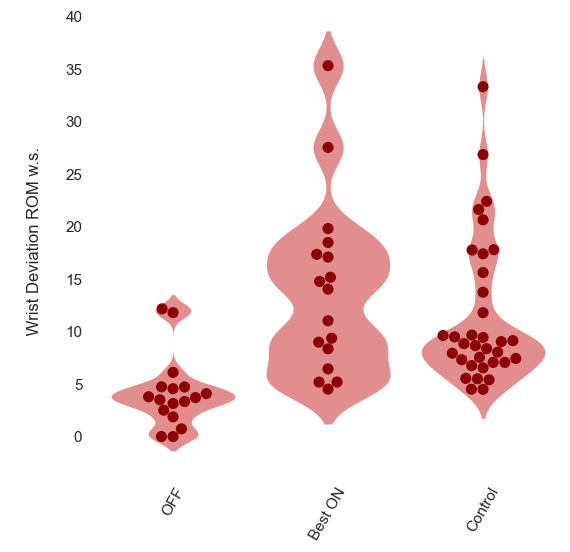

In [176]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="wrist_dev_rom_worstside", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "wrist_dev_rom_worstside", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Wrist Deviation ROM w.s. \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# ARM FLEXION MEAN VELOCITY W.S.

In [177]:
output_wide_BestON_OFF.groupby("Group").describe()["arm_flex_mean_vel_worstside"]

count       mean        std        min        25%        50%  \
Group                                                                   
BESTON    17.0  44.457703  29.839478  15.451210  23.992360  44.457703   
Control   34.0  29.554004  11.169953  11.348085  21.613599  30.549245   
OFF       17.0  12.325286   9.476394   0.000000   7.583290  11.070080   

               75%        max  
Group                          
BESTON   52.117100  133.91312  
Control  35.277014   51.62167  
OFF      14.026390   39.08279

In [178]:
kw_test(output_wide_BestON_OFF,'Group','arm_flex_mean_vel_worstside')

(26.9667,
 '<.0001',
 {'OFF vs. BESTON': ['arm_flex_mean_vel_worstside',
   -4.9176,
   '<.0001',
   '<.0001'],
  'OFF vs. Control': ['arm_flex_mean_vel_worstside',
   -4.2012,
   '<.0001',
   '<.0001'],
  'BESTON vs. Control': ['arm_flex_mean_vel_worstside',
   1.4772,
   '0.0698',
   '0.2094']})

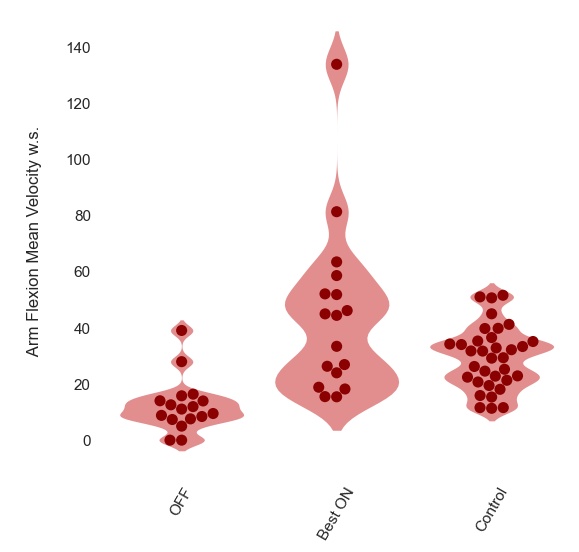

In [179]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="arm_flex_mean_vel_worstside", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "arm_flex_mean_vel_worstside", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Arm Flexion Mean Velocity w.s. \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# ARM ADDUCTION MEAN VELOCITY W.S.

In [180]:
output_wide_BestON_OFF.groupby("Group").describe()["arm_add_mean_vel_worstside"]

count       mean       std       min       25%       50%        75%  \
Group                                                                          
BESTON    17.0  20.877962  9.679293  8.294600  14.97368  16.61057  28.433620   
Control   34.0  16.347123  6.773816  8.198825  10.72482  15.76429  19.870407   
OFF       17.0   8.554890  4.239312  0.000000   6.24786   9.38205  11.602300   

               max  
Group               
BESTON   42.339850  
Control  32.188635  
OFF      15.023590

In [181]:
kw_test(output_wide_BestON_OFF,'Group','arm_add_mean_vel_worstside')

(20.566,
 '<.0001',
 {'OFF vs. BESTON': ['arm_add_mean_vel_worstside',
   -4.3018,
   '<.0001',
   '<.0001'],
  'OFF vs. Control': ['arm_add_mean_vel_worstside',
   -3.6554,
   '0.0001',
   '0.0004'],
  'BESTON vs. Control': ['arm_add_mean_vel_worstside',
   1.3119,
   '0.0948',
   '0.2843']})

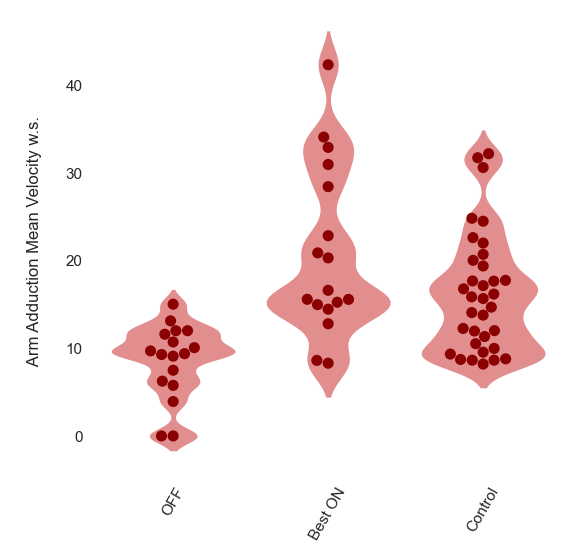

In [182]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="arm_add_mean_vel_worstside", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "arm_add_mean_vel_worstside", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Arm Adduction Mean Velocity w.s. \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# ARM ROTATION MEAN VELOCITY W.S.

In [183]:
output_wide_BestON_OFF.groupby("Group").describe()["arm_rot_mean_vel_worstside"]

count       mean        std       min        25%       50%       75%  \
Group                                                                           
BESTON    17.0  40.588490  26.305005  10.91401  20.277680  31.84332  53.37583   
Control   34.0  36.086503  16.161911  13.56606  24.306916  33.44547  45.32326   
OFF       17.0  14.496683  10.343083   0.00000   8.594820  11.26888  17.98727   

              max  
Group              
BESTON   89.08484  
Control  82.96313  
OFF      44.16775

In [184]:
kw_test(output_wide_BestON_OFF,'Group','arm_rot_mean_vel_worstside')

(22.8552,
 '<.0001',
 {'OFF vs. BESTON': ['arm_rot_mean_vel_worstside',
   -3.8595,
   '<.0001',
   '0.0002'],
  'OFF vs. Control': ['arm_rot_mean_vel_worstside',
   -4.5317,
   '<.0001',
   '<.0001'],
  'BESTON vs. Control': ['arm_rot_mean_vel_worstside',
   -0.0751,
   '0.4701',
   '1.4102']})

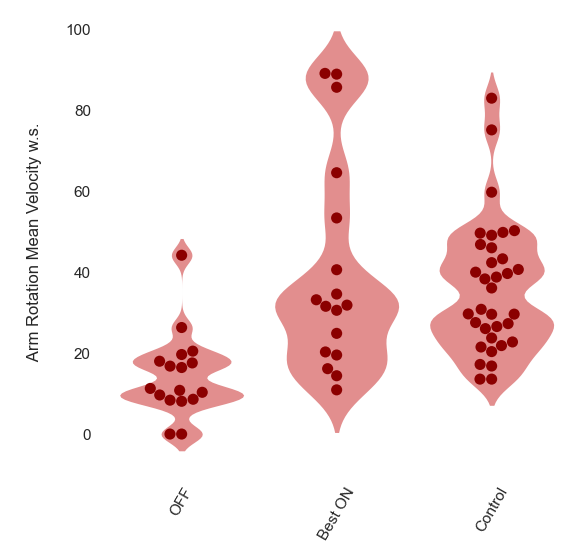

In [185]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="arm_rot_mean_vel_worstside", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "arm_rot_mean_vel_worstside", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Arm Rotation Mean Velocity w.s. \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# ELBOW FLEXION MEAN VELOCITY W.S.

In [186]:
output_wide_BestON_OFF.groupby("Group").describe()["elbow_flex_mean_vel_worstside"]

count       mean        std       min        25%        50%  \
Group                                                                  
BESTON    17.0  42.615689  25.766997  14.21676  24.071520  36.028040   
Control   34.0  25.842426  16.317791   6.81608  13.653633  21.277635   
OFF       17.0  13.625857   8.956371   0.00000   8.689660  12.683590   

               75%        max  
Group                          
BESTON   52.836960  95.078770  
Control  39.046509  69.486985  
OFF      15.897780  37.067950

In [187]:
kw_test(output_wide_BestON_OFF,'Group','elbow_flex_mean_vel_worstside')

(18.5106,
 '<.0001',
 {'OFF vs. BESTON': ['elbow_flex_mean_vel_worstside',
   -4.3018,
   '<.0001',
   '<.0001'],
  'OFF vs. Control': ['elbow_flex_mean_vel_worstside',
   -2.5337,
   '0.0056',
   '0.0169'],
  'BESTON vs. Control': ['elbow_flex_mean_vel_worstside',
   2.4336,
   '0.0075',
   '0.0224']})

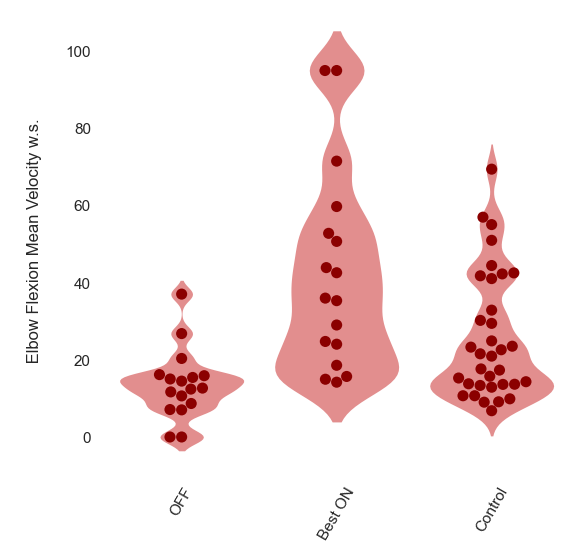

In [188]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="elbow_flex_mean_vel_worstside", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "elbow_flex_mean_vel_worstside", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Elbow Flexion Mean Velocity w.s. \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# PRONATION SUOINATION MEAN VELOCITY W.S.

In [189]:
output_wide_BestON_OFF.groupby("Group").describe()["pro_sup_mean_vel_worstside"]

count       mean        std       min        25%        50%  \
Group                                                                  
BESTON    17.0  43.203616  30.268975  16.37098  24.748930  29.916850   
Control   34.0  34.445997  18.034327  11.75473  21.662675  29.516085   
OFF       17.0  17.248237  17.315648   0.00000   8.225350  13.926380   

               75%         max  
Group                           
BESTON   43.203616  105.831530  
Control  42.475180   81.171385  
OFF      19.548001   74.897860

In [ ]:
output_wide_BestON_OFF.groupby("Group").describe()["hip_adduction_mean_vel_worstside"]


count       mean        std       min        25%       50%  \
Group                                                                 
BESTON    17.0  26.813960   5.449743  18.34265  22.625200  26.73369   
Control   34.0  29.934874   8.818873  16.19824  24.050348  28.79988   
OFF       17.0  16.732552  10.054104   0.00000   8.116720  18.66962   

               75%       max  
Group                         
BESTON   29.571730  36.98841  
Control  33.902554  50.97150  
OFF      22.771520  32.40617

In [190]:
kw_test(output_wide_BestON_OFF,'Group','pro_sup_mean_vel_worstside')

(17.3313,
 '0.0002',
 {'OFF vs. BESTON': ['pro_sup_mean_vel_worstside',
   -3.8248,
   '<.0001',
   '0.0002'],
  'OFF vs. Control': ['pro_sup_mean_vel_worstside',
   -3.5502,
   '0.0002',
   '0.0006'],
  'BESTON vs. Control': ['pro_sup_mean_vel_worstside',
   0.8663,
   '0.1932',
   '0.5795']})

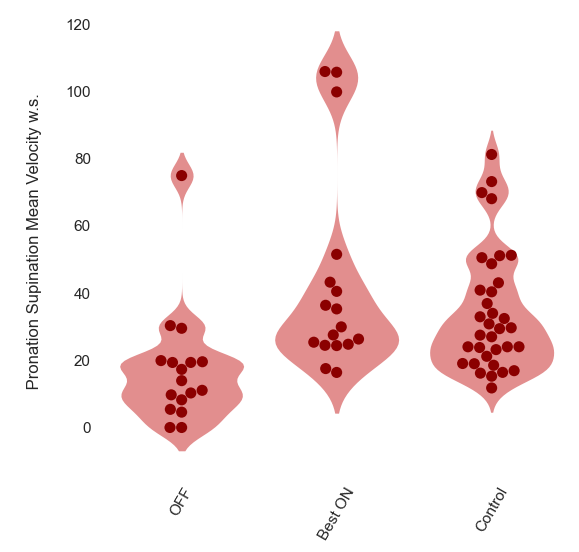

In [191]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="pro_sup_mean_vel_worstside", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "pro_sup_mean_vel_worstside", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Pronation Supination Mean Velocity w.s. \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# WRIST FLEXION MEAN VELOCITY W.S.

In [192]:
output_wide_BestON_OFF.groupby("Group").describe()["wrist_flex_mean_vel_worstside"]

count       mean        std       min        25%        50%  \
Group                                                                  
BESTON    17.0  43.663584  29.763870  11.43084  19.323040  32.564150   
Control   34.0  26.574900  12.718840   9.77240  16.064199  23.218377   
OFF       17.0  14.685650  11.417639   0.00000   8.507010  13.896270   

               75%         max  
Group                           
BESTON   64.110090  115.163230  
Control  36.612031   56.016865  
OFF      16.643737   46.612940

In [193]:
kw_test(output_wide_BestON_OFF,'Group','wrist_flex_mean_vel_worstside')

(17.1628,
 '0.0002',
 {'OFF vs. BESTON': ['wrist_flex_mean_vel_worstside',
   -4.0677,
   '<.0001',
   '<.0001'],
  'OFF vs. Control': ['wrist_flex_mean_vel_worstside',
   -2.9894,
   '0.0014',
   '0.0042'],
  'BESTON vs. Control': ['wrist_flex_mean_vel_worstside',
   1.7075,
   '0.0439',
   '0.1316']})

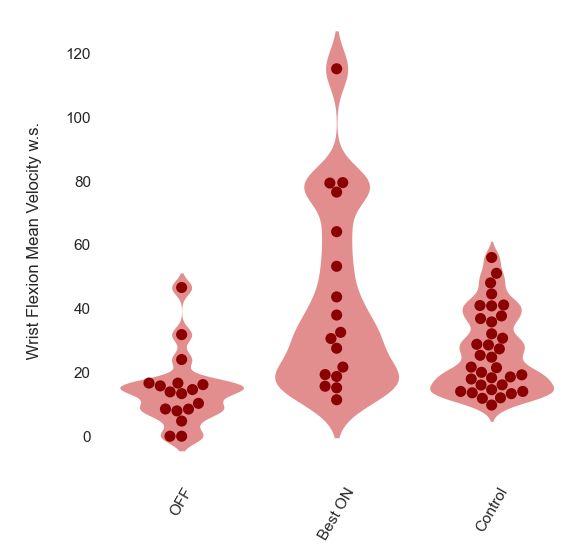

In [194]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="wrist_flex_mean_vel_worstside", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "wrist_flex_mean_vel_worstside", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Wrist Flexion Mean Velocity w.s. \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# WRIST DEVIATION MEAN VELOCITY W.S.

In [195]:
output_wide_BestON_OFF.groupby("Group").describe()["wrist_dev_mean_vel_worstside"]

count       mean        std      min       25%        50%        75%  \
Group                                                                           
BESTON    17.0  29.662631  20.889510  8.55199  14.30952  26.593320  33.888950   
Control   34.0  24.308976  14.713297  7.65083  13.77496  17.073493  33.141325   
OFF       17.0   9.848800   8.432293  0.00000   5.52606   7.949700  11.161974   

               max  
Group               
BESTON   84.749000  
Control  65.440535  
OFF      28.044260

In [196]:
kw_test(output_wide_BestON_OFF,'Group','wrist_dev_mean_vel_worstside')

(19.9569,
 '<.0001',
 {'OFF vs. BESTON': ['wrist_dev_mean_vel_worstside',
   -3.9636,
   '<.0001',
   '0.0001'],
  'OFF vs. Control': ['wrist_dev_mean_vel_worstside',
   -3.9709,
   '<.0001',
   '0.0001'],
  'BESTON vs. Control': ['wrist_dev_mean_vel_worstside',
   0.6059,
   '0.2723',
   '0.8169']})

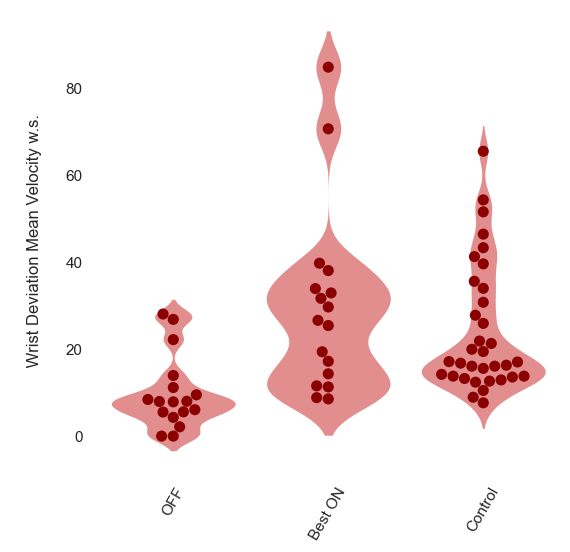

In [197]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="wrist_dev_mean_vel_worstside", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "wrist_dev_mean_vel_worstside", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Wrist Deviation Mean Velocity w.s. \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# ENTROPY 1

In [198]:
output_wide_BestON_OFF.groupby("Group").describe()["entropy1"]

count      mean       std      min       25%      50%       75%  \
Group                                                                      
BESTON    17.0  0.643890  0.535423  0.21917  0.342290  0.37735  0.550730   
Control   34.0  0.383375  0.358206  0.14260  0.213645  0.28768  0.350878   
OFF       17.0  0.414372  0.255984  0.00000  0.312780  0.42276  0.499280   

             max  
Group             
BESTON   1.76327  
Control  1.68372  
OFF      1.05946

In [199]:
kw_test(output_wide_BestON_OFF,'Group','entropy1')

(8.7207,
 '0.0128',
 {'OFF vs. BESTON': ['entropy1', -0.6418, '0.2605', '0.7815'],
  'OFF vs. Control': ['entropy1', 1.9829, '0.0237', '0.0711'],
  'BESTON vs. Control': ['entropy1', 2.724, '0.0032', '0.0097']})

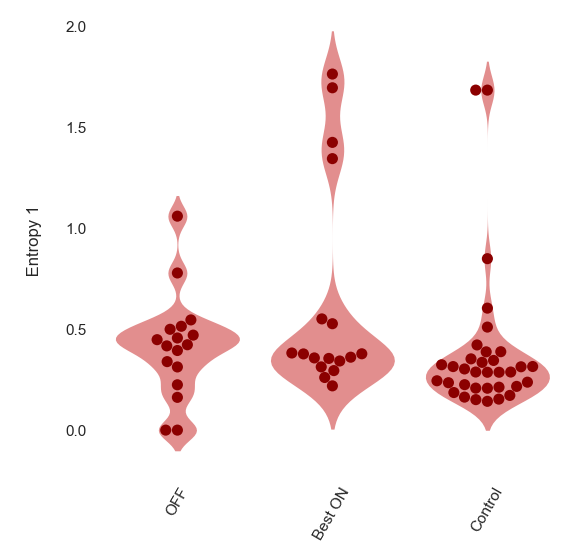

In [200]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="entropy1", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "entropy1", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Entropy 1 \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# ENTROPY 2

In [201]:
output_wide_BestON_OFF.groupby("Group").describe()["entropy2"]

count      mean       std      min       25%       50%      75%  \
Group                                                                      
BESTON    17.0  1.626021  0.498665  0.72939  1.074740  1.790120  2.01933   
Control   34.0  1.273364  0.596707  0.46832  0.681848  1.275885  1.80409   
OFF       17.0  0.837625  0.609866  0.00000  0.466790  0.729700  0.93246   

             max  
Group             
BESTON   2.21966  
Control  2.11516  
OFF      2.03270

In [202]:
kw_test(output_wide_BestON_OFF,'Group','entropy2')

(12.3685,
 '0.0021',
 {'OFF vs. BESTON': ['entropy2', -3.5126, '0.0002', '0.0007'],
  'OFF vs. Control': ['entropy2', -1.8878, '0.0295', '0.0886'],
  'BESTON vs. Control': ['entropy2', 2.1682, '0.0151', '0.0452']})

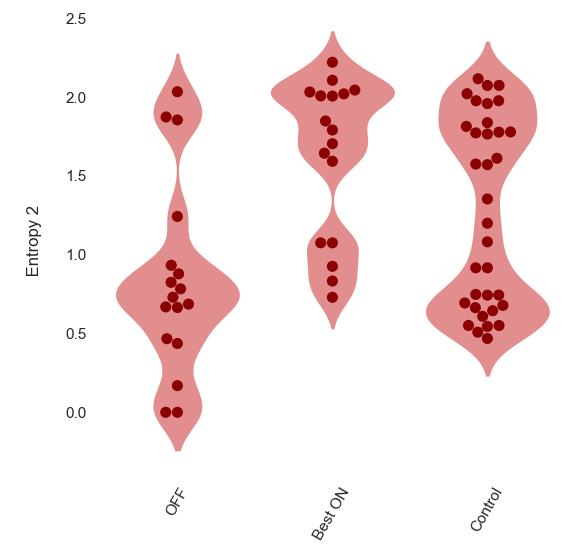

In [203]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="entropy2", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "entropy2", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Entropy 2 \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# ENTROPY 3

In [204]:
output_wide_BestON_OFF.groupby("Group").describe()["entropy3"]

count      mean       std      min       25%      50%       75%  \
Group                                                                      
BESTON    17.0  1.708353  0.425821  0.80304  1.509560  1.92860  2.005900   
Control   34.0  1.424960  0.614802  0.39621  0.717785  1.74574  1.925875   
OFF       17.0  1.301999  0.642184  0.00000  0.921570  1.42911  1.787430   

             max  
Group             
BESTON   2.24440  
Control  2.20583  
OFF      2.08809

In [205]:
kw_test(output_wide_BestON_OFF,'Group','entropy3')

(4.3902,
 '0.1113',
 {'OFF vs. BESTON': ['entropy3', -2.0035, '0.0226', '0.0677'],
  'OFF vs. Control': ['entropy3', -0.656, '0.2559', '0.7677'],
  'BESTON vs. Control': ['entropy3', 1.6574, '0.0487', '0.1462']})

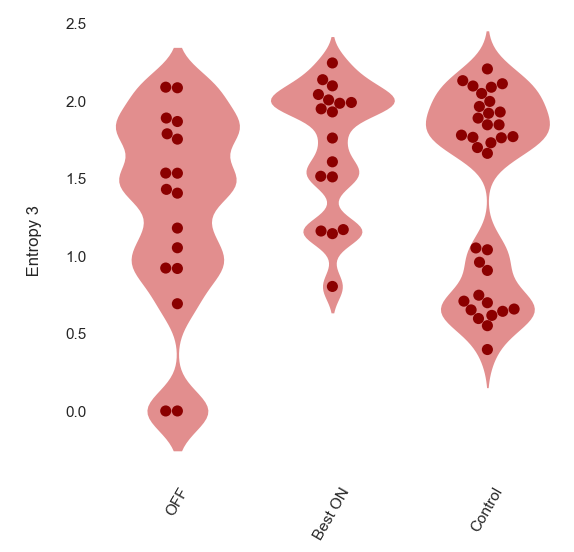

In [206]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="entropy3", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "entropy3", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Entropy 3 \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# HARONIC RATIO ANTERO-POSTERIOR

In [207]:
output_wide_BestON_OFF.groupby("Group").describe()["hr_ap"]

count      mean       std      min       25%      50%      75%  \
Group                                                                     
BESTON    17.0  1.317444  0.695989  0.37233  0.804910  1.22493  1.63338   
Control   34.0  2.167184  1.356235  0.42489  1.033532  1.71941  3.32791   
OFF       17.0  1.212975  1.396579  0.00000  0.251530  0.74788  1.46216   

             max  
Group             
BESTON   3.01984  
Control  4.90470  
OFF      4.67981

In [208]:
kw_test(output_wide_BestON_OFF,'Group','hr_ap')

(9.4808,
 '0.0087',
 {'OFF vs. BESTON': ['hr_ap', -1.0494, '0.147', '0.441'],
  'OFF vs. Control': ['hr_ap', -2.9694, '0.0015', '0.0045'],
  'BESTON vs. Control': ['hr_ap', -1.7576, '0.0394', '0.1182']})

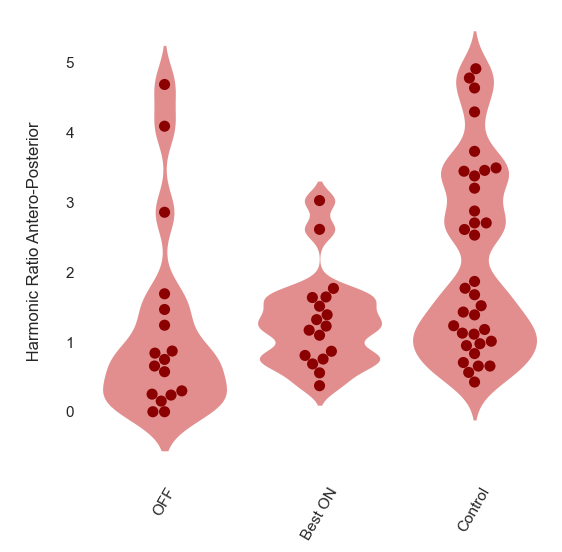

In [209]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="hr_ap", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "hr_ap", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Harmonic Ratio Antero-Posterior \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# HARMONIC RATIO VERTICAL

In [210]:
output_wide_BestON_OFF.groupby("Group").describe()["hr_vert"]

count      mean       std      min       25%      50%      75%  \
Group                                                                     
BESTON    17.0  1.329508  0.777473  0.26142  0.996800  1.15070  1.48114   
Control   34.0  1.668407  1.421693  0.26169  0.751402  1.23637  2.40728   
OFF       17.0  0.727598  0.663152  0.00000  0.446800  0.54054  0.73395   

             max  
Group             
BESTON   3.16124  
Control  6.58247  
OFF      2.69304

In [211]:
kw_test(output_wide_BestON_OFF,'Group','hr_vert')

(11.6449,
 '0.003',
 {'OFF vs. BESTON': ['hr_vert', -2.6626, '0.0039', '0.0116'],
  'OFF vs. Control': ['hr_vert', -3.2798, '0.0005', '0.0016'],
  'BESTON vs. Control': ['hr_vert', -0.2053, '0.4187', '1.256']})

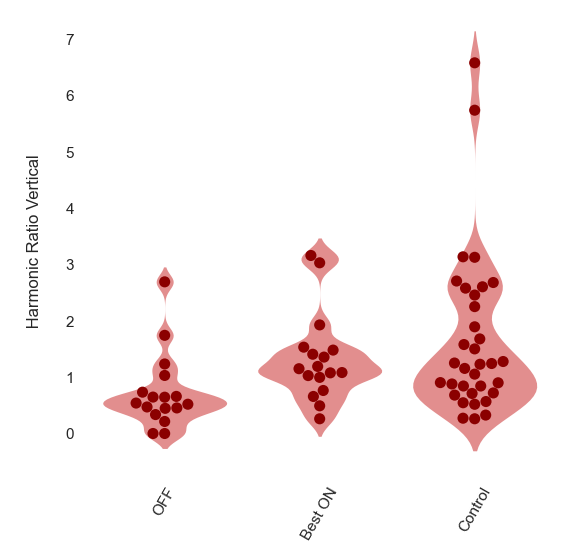

In [212]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="hr_vert", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "hr_vert", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Harmonic Ratio Vertical \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# HARMONIC RATIO MEDIO-LATERAL

In [213]:
output_wide_BestON_OFF.groupby("Group").describe()["hr_ml"]

count      mean       std      min       25%       50%       75%  \
Group                                                                       
BESTON    17.0  3.301331  1.614094  1.76033  2.438940  2.728030  3.301750   
Control   34.0  2.946012  1.566682  0.78450  1.936987  2.624065  3.732902   
OFF       17.0  3.081681  2.322093  0.00000  1.673430  2.876710  3.512530   

             max  
Group             
BESTON   8.62835  
Control  7.52514  
OFF      8.88758

In [214]:
kw_test(output_wide_BestON_OFF,'Group','hr_ml')

(0.8093,
 '0.6672',
 {'OFF vs. BESTON': ['hr_ml', -0.8153, '0.2075', '0.6224'],
  'OFF vs. Control': ['hr_ml', -0.1602, '0.4364', '1.3091'],
  'BESTON vs. Control': ['hr_ml', 0.7812, '0.2173', '0.652']})

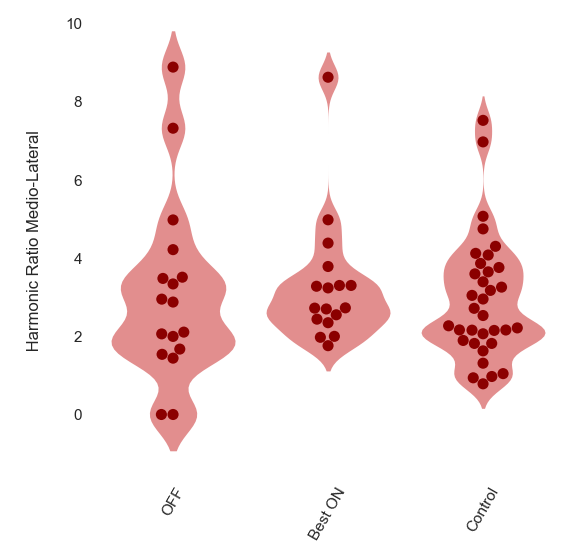

In [215]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="hr_ml", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "hr_ml", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Harmonic Ratio Medio-Lateral \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# CENTER-OF-MASS ANTERO-POSTERIOR

In [216]:
output_wide_BestON_OFF.groupby("Group").describe()["com_rms_ap"]

count      mean       std      min       25%       50%      75%  \
Group                                                                      
BESTON    17.0  0.014402  0.006704  0.00732  0.008660  0.012660  0.02054   
Control   34.0  0.012358  0.005678  0.00774  0.009173  0.009965  0.01346   
OFF       17.0  0.010918  0.006641  0.00000  0.006860  0.009940  0.01670   

             max  
Group             
BESTON   0.02794  
Control  0.03257  
OFF      0.02095

In [217]:
kw_test(output_wide_BestON_OFF,'Group','com_rms_ap')

(1.7504,
 '0.4168',
 {'OFF vs. BESTON': ['com_rms_ap', -1.3226, '0.093', '0.279'],
  'OFF vs. Control': ['com_rms_ap', -0.7887, '0.2151', '0.6454'],
  'BESTON vs. Control': ['com_rms_ap', 0.7386, '0.2301', '0.6902']})

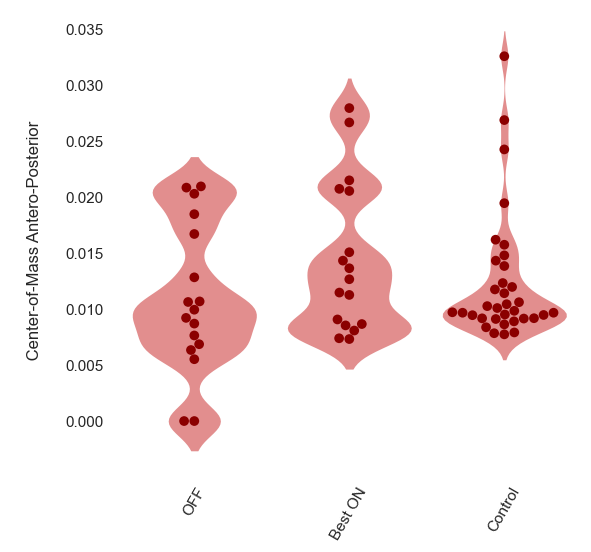

In [220]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="com_rms_ap", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "com_rms_ap", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 7, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Center-of-Mass Antero-Posterior \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# CENTER-OF-MEDICAL VERTICAL

In [9]:
output_wide_BestON_OFF.groupby("Group").describe()["com_rms_vert"]

count      mean       std      min      25%      50%       75%  \
Group                                                                     
BESTON    17.0  0.029612  0.006294  0.00866  0.02888  0.02958  0.031500   
Control   34.0  0.029520  0.002637  0.02257  0.02815  0.02971  0.031085   
OFF       17.0  0.027486  0.011638  0.00000  0.02977  0.03177  0.033620   

             max  
Group             
BESTON   0.04197  
Control  0.03565  
OFF      0.03679

In [10]:
kw_test(output_wide_BestON_OFF,'Group','com_rms_vert')

(4.2399,
 '0.12',
 {'OFF vs. BESTON': ['com_rms_vert', 1.1362, '0.1279', '0.3838'],
  'OFF vs. Control': ['com_rms_vert', 2.058, '0.0198', '0.0594'],
  'BESTON vs. Control': ['com_rms_vert', 0.7461, '0.2278', '0.6834']})

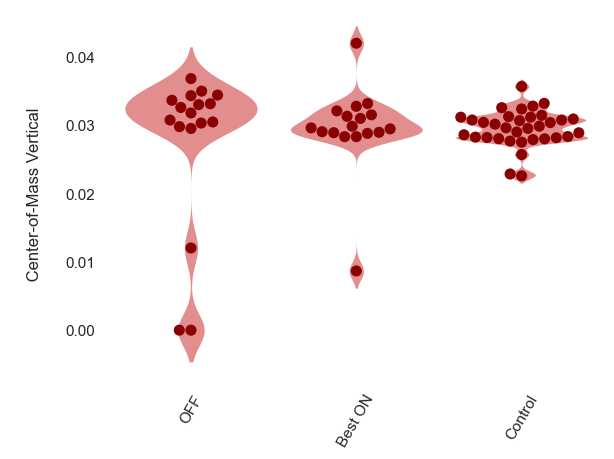

In [11]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="com_rms_vert", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "com_rms_vert", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Center-of-Mass Vertical \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# CENTER-OF-MASS MEDIO-LATERAL

In [12]:
output_wide_BestON_OFF.groupby("Group").describe()["com_rms_ml"]

count      mean       std      min       25%       50%       75%  \
Group                                                                       
BESTON    17.0  0.014441  0.006565  0.00667  0.009940  0.013140  0.019020   
Control   34.0  0.010962  0.004028  0.00386  0.008098  0.010745  0.013803   
OFF       17.0  0.008646  0.006045  0.00000  0.006900  0.008030  0.010790   

             max  
Group             
BESTON   0.03282  
Control  0.01841  
OFF      0.02663

In [13]:
kw_test(output_wide_BestON_OFF,'Group','com_rms_ml')

(8.5434,
 '0.014',
 {'OFF vs. BESTON': ['com_rms_ml', -2.9228, '0.0017', '0.0052'],
  'OFF vs. Control': ['com_rms_ml', -1.6875, '0.0458', '0.1373'],
  'BESTON vs. Control': ['com_rms_ml', 1.6875, '0.0458', '0.1373']})

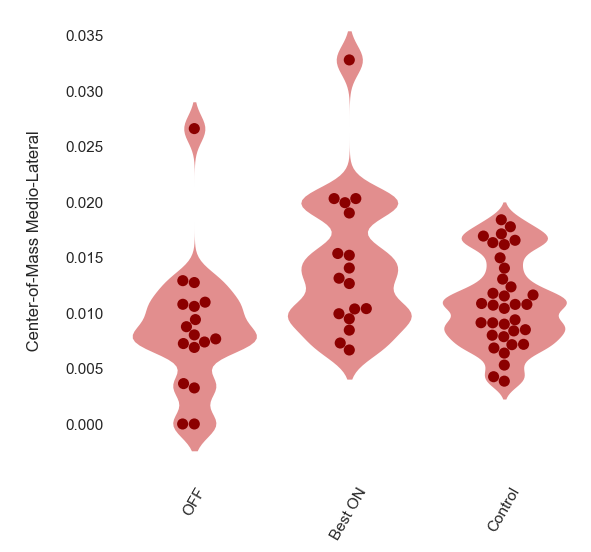

In [14]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="com_rms_ml", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "com_rms_ml", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Center-of-Mass Medio-Lateral \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# SPEED VARIABILITY

In [227]:
output_wide_BestON_OFF.groupby("Group").describe()["CV Speed"]

count      mean       std       min       25%       50%       75%  \
Group                                                                        
BESTON    17.0  0.279220  0.101283  0.101087  0.202325  0.294649  0.315277   
Control   34.0  0.279941  0.084807  0.125172  0.223226  0.272056  0.324961   
OFF       17.0  0.334525  0.376611  0.000000  0.165949  0.273820  0.334202   

              max  
Group              
BESTON   0.565378  
Control  0.509755  
OFF      1.676691

In [228]:
kw_test(output_wide_BestON_OFF,'Group','CV Speed')

(0.3497,
 '0.8396',
 {'OFF vs. BESTON': ['CV Speed', -0.4423, '0.3291', '0.9874'],
  'OFF vs. Control': ['CV Speed', -0.5759, '0.2823', '0.847'],
  'BESTON vs. Control': ['CV Speed', -0.0651, '0.474', '1.4221']})

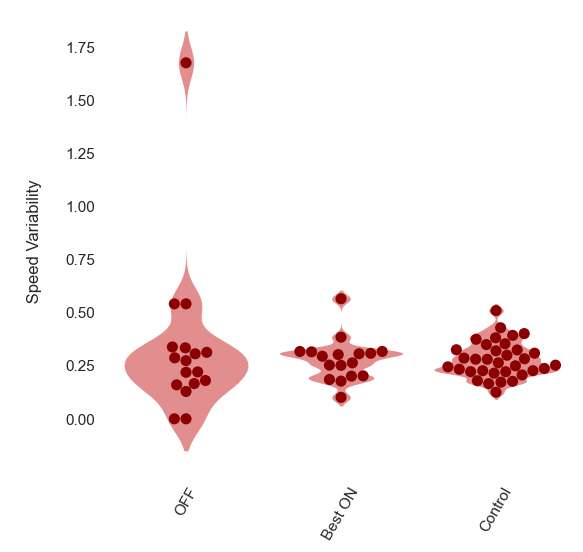

In [229]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="CV Speed", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "CV Speed", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Speed Variability \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# STEP LENGTH VARIABILTY

In [230]:
output_wide_BestON_OFF.groupby("Group").describe()["CV Stept Lenght"]

count      mean       std       min       25%       50%       75%  \
Group                                                                        
BESTON    17.0  0.198140  0.073102  0.063701  0.142482  0.212522  0.237950   
Control   34.0  0.241080  0.072789  0.120826  0.186913  0.230753  0.277221   
OFF       17.0  0.240639  0.186979  0.000000  0.143022  0.185794  0.289244   

              max  
Group              
BESTON   0.317669  
Control  0.417689  
OFF      0.683623

In [231]:
kw_test(output_wide_BestON_OFF,'Group','CV Stept Lenght')

(2.9549,
 '0.2282',
 {'OFF vs. BESTON': ['CV Stept Lenght', 0.0781, '0.4689', '1.4066'],
  'OFF vs. Control': ['CV Stept Lenght', -1.357, '0.0874', '0.2622'],
  'BESTON vs. Control': ['CV Stept Lenght', -1.4471, '0.0739', '0.2218']})

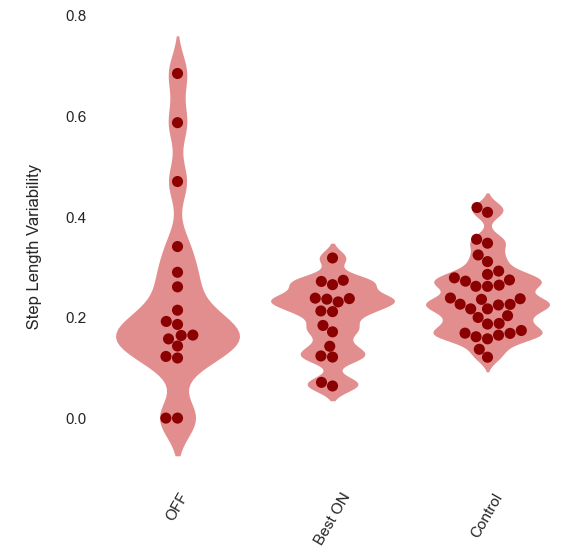

In [232]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="CV Stept Lenght", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "CV Stept Lenght", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Step Length Variability \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# STEP TIME VARIABILITY

In [234]:
output_wide_BestON_OFF.groupby("Group").describe()["CV Step time"]

count      mean       std       min       25%       50%       75%  \
Group                                                                        
BESTON    17.0  0.054239  0.028779  0.023438  0.036218  0.044668  0.063496   
Control   34.0  0.062170  0.038538  0.033372  0.039312  0.052900  0.073702   
OFF       17.0  0.102457  0.135199  0.000000  0.039152  0.049279  0.137963   

              max  
Group              
BESTON   0.125636  
Control  0.254204  
OFF      0.546918

In [235]:
kw_test(output_wide_BestON_OFF,'Group','CV Step time')

(0.9835,
 '0.6116',
 {'OFF vs. BESTON': ['CV Step time', 0.5898, '0.2777', '0.833'],
  'OFF vs. Control': ['CV Step time', -0.3105, '0.3781', '1.1343'],
  'BESTON vs. Control': ['CV Step time', -0.9915, '0.1607', '0.4822']})

/Users/pauloandrediasbastos/Desktop/Levodopa Challenge Test/Clinical/venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 14.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


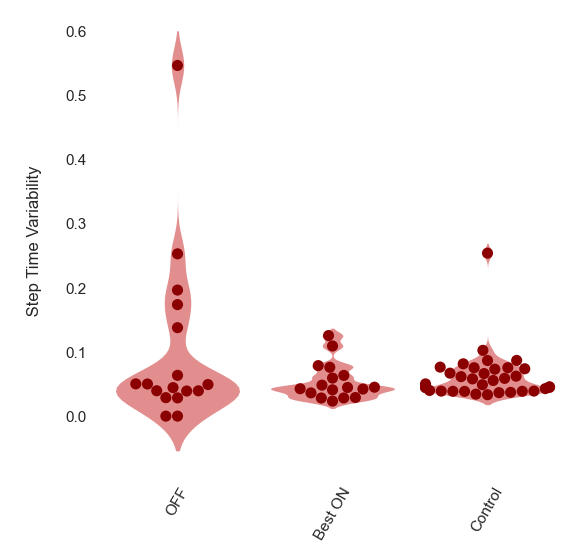

In [237]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="CV Step time", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "CV Step time", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Step Time Variability \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# STEP WIDTH VARIABILITY

In [238]:
output_wide_BestON_OFF.groupby("Group").describe()["Cv Step Width"]

count      mean       std       min       25%       50%       75%  \
Group                                                                        
BESTON    17.0  0.317844  0.071828  0.196972  0.261770  0.313743  0.379467   
Control   34.0  0.343987  0.066789  0.193842  0.307712  0.331845  0.379195   
OFF       17.0  0.270374  0.143109  0.000000  0.181974  0.296655  0.403884   

              max  
Group              
BESTON   0.457444  
Control  0.482953  
OFF      0.459704

In [239]:
kw_test(output_wide_BestON_OFF,'Group','Cv Step Width')

(3.183,
 '0.2036',
 {'OFF vs. BESTON': ['Cv Step Width', -0.5637, '0.2865', '0.8594'],
  'OFF vs. Control': ['Cv Step Width', -1.7075, '0.0439', '0.1316'],
  'BESTON vs. Control': ['Cv Step Width', -1.0566, '0.1453', '0.436']})

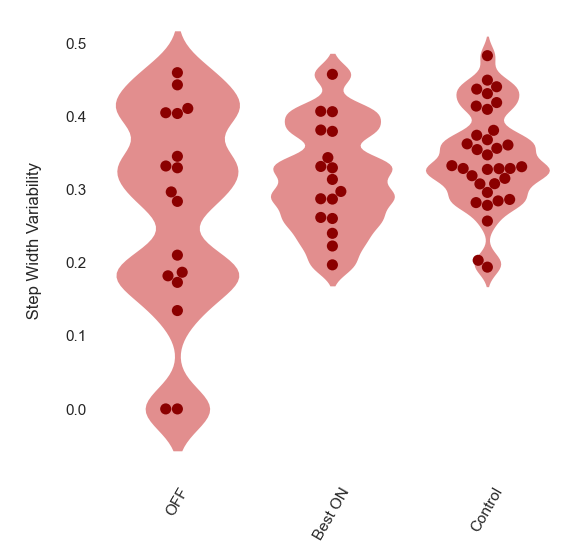

In [240]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Cv Step Width", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Cv Step Width", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Step Width Variability \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# STRIDE TIME VARIABILITY

In [244]:
output_wide_BestON_OFF.groupby("Group").describe()["CV Stride Time"]

count      mean       std       min       25%       50%       75%  \
Group                                                                        
BESTON    17.0  0.051358  0.035523  0.021500  0.032734  0.039584  0.052521   
Control   34.0  0.043161  0.017036  0.020958  0.032835  0.037481  0.050199   
OFF       17.0  0.107010  0.153581  0.000000  0.027905  0.040536  0.102456   

              max  
Group              
BESTON   0.163996  
Control  0.094472  
OFF      0.551437

In [245]:
kw_test(output_wide_BestON_OFF,'Group','CV Stride Time')

(0.2643,
 '0.8762',
 {'OFF vs. BESTON': ['CV Stride Time', 0.2168, '0.4142', '1.2425'],
  'OFF vs. Control': ['CV Stride Time', 0.5057, '0.3065', '0.9196'],
  'BESTON vs. Control': ['CV Stride Time', 0.2554, '0.3992', '1.1976']})

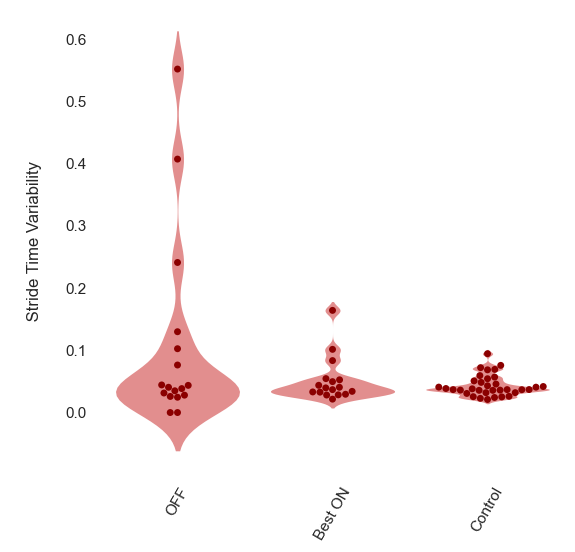

In [249]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="CV Stride Time", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "CV Stride Time", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 5, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Stride Time Variability \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# STRIDE LENGTH VARIABILITY

In [250]:
output_wide_BestON_OFF.groupby("Group").describe()["Cv Stride Lenght"]

count      mean       std       min       25%       50%       75%  \
Group                                                                        
BESTON    17.0  0.127703  0.056755  0.038079  0.086565  0.130237  0.139480   
Control   34.0  0.132331  0.049563  0.063123  0.092913  0.117060  0.177042   
OFF       17.0  0.156440  0.106078  0.000000  0.097380  0.135896  0.162314   

              max  
Group              
BESTON   0.275369  
Control  0.230247  
OFF      0.405708

In [251]:
kw_test(output_wide_BestON_OFF,'Group','Cv Stride Lenght')

(1.0592,
 '0.5888',
 {'OFF vs. BESTON': ['Cv Stride Lenght', 1.0147, '0.1551', '0.4654'],
  'OFF vs. Control': ['Cv Stride Lenght', 0.7261, '0.2339', '0.7017'],
  'BESTON vs. Control': ['Cv Stride Lenght', -0.4457, '0.3279', '0.9837']})

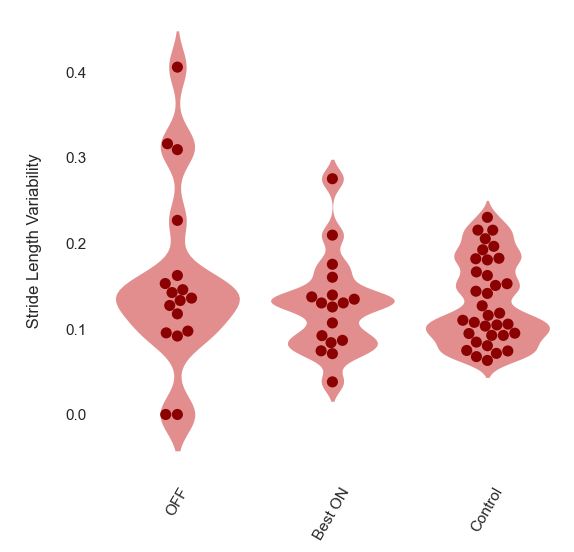

In [253]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Cv Stride Lenght", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Cv Stride Lenght", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Stride Length Variability \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# DOUBLE SUPPORT VARIABILITY

In [254]:
output_wide_BestON_OFF.groupby("Group").describe()["CV Double Support"]

count      mean       std       min       25%       50%       75%  \
Group                                                                        
BESTON    17.0  0.139111  0.072643  0.056958  0.097115  0.118410  0.145959   
Control   34.0  0.139693  0.092049  0.067012  0.080705  0.106747  0.167301   
OFF       17.0  0.118660  0.119512  0.000000  0.081801  0.104201  0.106603   

              max  
Group              
BESTON   0.361628  
Control  0.537073  
OFF      0.546520

In [255]:
kw_test(output_wide_BestON_OFF,'Group','CV Double Support')

(2.1775,
 '0.3366',
 {'OFF vs. BESTON': ['CV Double Support', -1.4571, '0.0725', '0.2176'],
  'OFF vs. Control': ['CV Double Support', -1.0315, '0.1512', '0.4535'],
  'BESTON vs. Control': ['CV Double Support', 0.651, '0.2575', '0.7726']})

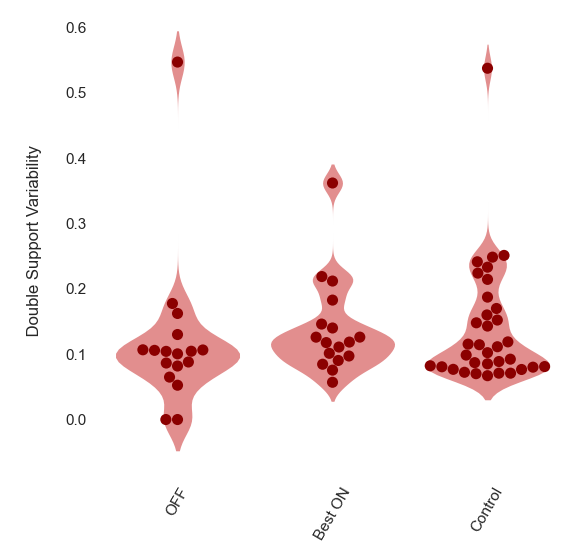

In [256]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="CV Double Support", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "CV Double Support", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Double Support Variability \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# STANCE FRACTION VARIABILITY

In [257]:
output_wide_BestON_OFF.groupby("Group").describe()["CV Stance Fraction"]

count      mean       std       min       25%       50%       75%  \
Group                                                                        
BESTON    17.0  0.036208  0.028696  0.017219  0.022390  0.026756  0.036402   
Control   34.0  0.029998  0.013579  0.014618  0.020298  0.025680  0.034920   
OFF       17.0  0.050965  0.087510  0.000000  0.024419  0.027155  0.031323   

              max  
Group              
BESTON   0.133066  
Control  0.063601  
OFF      0.377401

In [258]:
kw_test(output_wide_BestON_OFF,'Group','CV Stance Fraction')

(0.304,
 '0.859',
 {'OFF vs. BESTON': ['CV Stance Fraction', 0.1127, '0.4551', '1.3654'],
  'OFF vs. Control': ['CV Stance Fraction', 0.5057, '0.3065', '0.9196'],
  'BESTON vs. Control': ['CV Stance Fraction', 0.3756, '0.3536', '1.0608']})

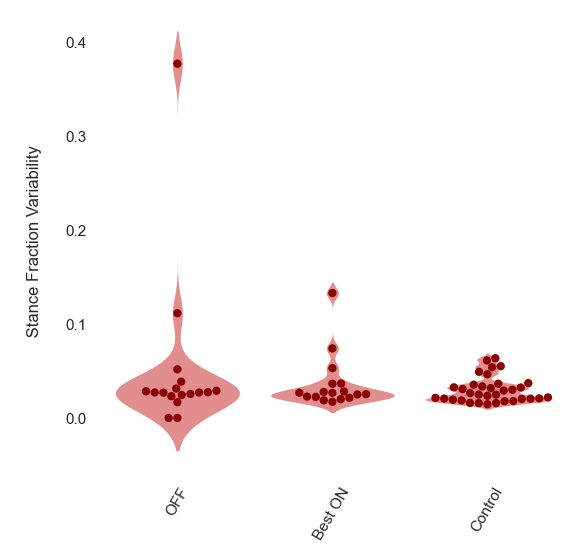

In [260]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="CV Stance Fraction", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "CV Stance Fraction", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 6, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Stance Fraction Variability \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# STEP TIME ASYMMETRY

In [261]:
output_wide_BestON_OFF.groupby("Group").describe()["Step Time Asymetry N"]

count      mean       std       min       25%       50%       75%  \
Group                                                                        
BESTON    17.0  0.030775  0.032164  0.000773  0.014504  0.020699  0.030564   
Control   34.0  0.034950  0.071539  0.001409  0.009327  0.018057  0.035844   
OFF       17.0  0.055783  0.092062  0.000000  0.005450  0.032068  0.077761   

              max  
Group              
BESTON   0.112768  
Control  0.425043  
OFF      0.383606

In [262]:
kw_test(output_wide_BestON_OFF,'Group','Step Time Asymetry N')

(0.305,
 '0.8586',
 {'OFF vs. BESTON': ['Step Time Asymetry N', 0.0173, '0.4931', '1.4793'],
  'OFF vs. Control': ['Step Time Asymetry N', 0.4607, '0.3225', '0.9675'],
  'BESTON vs. Control': ['Step Time Asymetry N', 0.4407, '0.3297', '0.9891']})

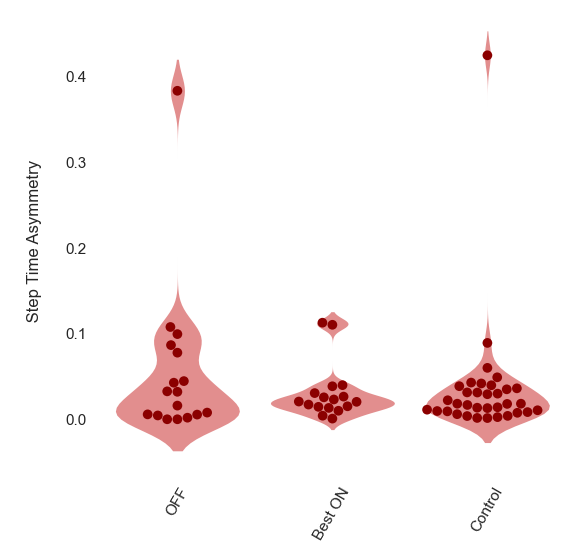

In [265]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Step Time Asymetry N", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Step Time Asymetry N", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 7, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Step Time Asymmetry \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# STEP LENGTH ASYMMETRY

In [266]:
output_wide_BestON_OFF.groupby("Group").describe()["Step lenght AsymetryN"]

count      mean       std       min       25%       50%       75%  \
Group                                                                        
BESTON    17.0  0.248793  0.217931  0.023816  0.105046  0.255112  0.302344   
Control   34.0  0.201592  0.191354  0.010000  0.068116  0.142733  0.231671   
OFF       17.0  0.165264  0.232062  0.000000  0.027804  0.106101  0.237960   

              max  
Group              
BESTON   0.963271  
Control  0.913144  
OFF      0.980626

In [267]:
kw_test(output_wide_BestON_OFF,'Group','Step lenght AsymetryN')

(4.8534,
 '0.0883',
 {'OFF vs. BESTON': ['Step lenght AsymetryN', -2.203, '0.0138', '0.0414'],
  'OFF vs. Control': ['Step lenght AsymetryN', -1.2819, '0.0999', '0.2998'],
  'BESTON vs. Control': ['Step lenght AsymetryN', 1.2619, '0.1035', '0.3105']})

In [269]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Step lenght AsymetryN", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Step lenght AsymetryN", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 7, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Step Length Asymmetry \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# STANCE FRACTION ASYMETRY

In [270]:
output_wide_BestON_OFF.groupby("Group").describe()["Stance Fraction (% gait cyce) Asymetry N"]

count      mean       std       min       25%       50%       75%  \
Group                                                                        
BESTON    17.0  0.031427  0.023566  0.000329  0.017174  0.026133  0.051326   
Control   34.0  0.057092  0.055555  0.000211  0.019367  0.039237  0.079592   
OFF       17.0  0.052665  0.067075  0.000000  0.008167  0.029833  0.069040   

              max  
Group              
BESTON   0.075236  
Control  0.280792  
OFF      0.244602

In [271]:
kw_test(output_wide_BestON_OFF,'Group','Stance Fraction (% gait cyce) Asymetry N')

(2.3499,
 '0.3088',
 {'OFF vs. BESTON': ['Stance Fraction (% gait cyce) Asymetry N',
   0.4683,
   '0.3198',
   '0.9594'],
  'OFF vs. Control': ['Stance Fraction (% gait cyce) Asymetry N',
   -0.9214,
   '0.1784',
   '0.5353'],
  'BESTON vs. Control': ['Stance Fraction (% gait cyce) Asymetry N',
   -1.4622,
   '0.0718',
   '0.2155']})

In [273]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Stance Fraction (% gait cyce) Asymetry N", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Stance Fraction (% gait cyce) Asymetry N", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Stance Fraction Asymmetry \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# STANCE TIME ASYMMETRY

In [274]:
output_wide_BestON_OFF.groupby("Group").describe()["Stance Time Asymetry N"]

count      mean       std       min       25%       50%       75%  \
Group                                                                        
BESTON    17.0  0.031491  0.023517  0.000837  0.017174  0.026286  0.051326   
Control   34.0  0.028740  0.028255  0.000111  0.009684  0.021310  0.043702   
OFF       17.0  0.052583  0.067049  0.000000  0.008167  0.029832  0.069040   

              max  
Group              
BESTON   0.075236  
Control  0.145856  
OFF      0.244602

In [275]:
kw_test(output_wide_BestON_OFF,'Group','Stance Time Asymetry N')

(0.9088,
 '0.6348',
 {'OFF vs. BESTON': ['Stance Time Asymetry N', 0.1995, '0.4209', '1.2628'],
  'OFF vs. Control': ['Stance Time Asymetry N', 0.8763, '0.1904', '0.5713'],
  'BESTON vs. Control': ['Stance Time Asymetry N', 0.646, '0.2591', '0.7774']})

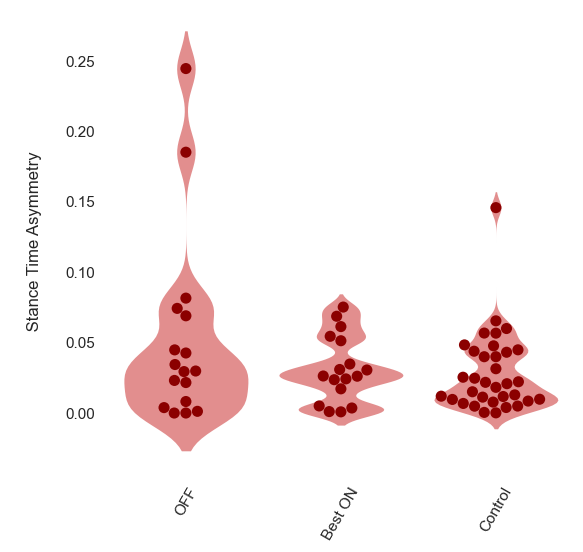

In [277]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Stance Time Asymetry N", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Stance Time Asymetry N", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Stance Time Asymmetry \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# SWING FRACTION ASYMMETRY

In [278]:
output_wide_BestON_OFF.groupby("Group").describe()["Swing Fraction (%gait cycle) Asymetry N"]

count      mean       std       min       25%       50%       75%  \
Group                                                                        
BESTON    17.0  0.062529  0.047123  0.000580  0.034967  0.053463  0.106259   
Control   34.0  0.057092  0.055555  0.000211  0.019367  0.039237  0.079592   
OFF       17.0  0.091569  0.090559  0.000000  0.018934  0.062026  0.137532   

              max  
Group              
BESTON   0.146961  
Control  0.280792  
OFF      0.331235

In [279]:
kw_test(output_wide_BestON_OFF,'Group','Swing Fraction (%gait cycle) Asymetry N')

(1.3401,
 '0.5117',
 {'OFF vs. BESTON': ['Swing Fraction (%gait cycle) Asymetry N',
   0.503,
   '0.3075',
   '0.9224'],
  'OFF vs. Control': ['Swing Fraction (%gait cycle) Asymetry N',
   1.1417,
   '0.1268',
   '0.3804'],
  'BESTON vs. Control': ['Swing Fraction (%gait cycle) Asymetry N',
   0.5608,
   '0.2875',
   '0.8624']})

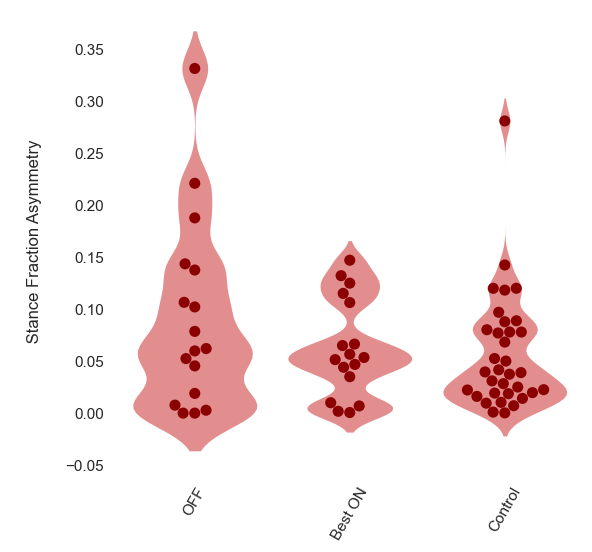

In [280]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Swing Fraction (%gait cycle) Asymetry N", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Swing Fraction (%gait cycle) Asymetry N", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Stance Fraction Asymmetry \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)

# SWING TIME ASYMMETRY

In [281]:
output_wide_BestON_OFF.groupby("Group").describe()["Swing Time Asymetry N"]

count      mean       std       min       25%       50%       75%  \
Group                                                                        
BESTON    17.0  0.062654  0.047034  0.001477  0.034967  0.053463  0.106259   
Control   34.0  0.057093  0.055554  0.000220  0.019378  0.039239  0.079579   
OFF       17.0  0.091457  0.090450  0.000000  0.018934  0.062024  0.137532   

              max  
Group              
BESTON   0.146961  
Control  0.280788  
OFF      0.331235

In [282]:
kw_test(output_wide_BestON_OFF,'Group','Swing Time Asymetry N')

(1.3581,
 '0.5071',
 {'OFF vs. BESTON': ['Swing Time Asymetry N', 0.4683, '0.3198', '0.9594'],
  'OFF vs. Control': ['Swing Time Asymetry N', 1.1417, '0.1268', '0.3804'],
  'BESTON vs. Control': ['Swing Time Asymetry N', 0.6009, '0.274', '0.8219']})

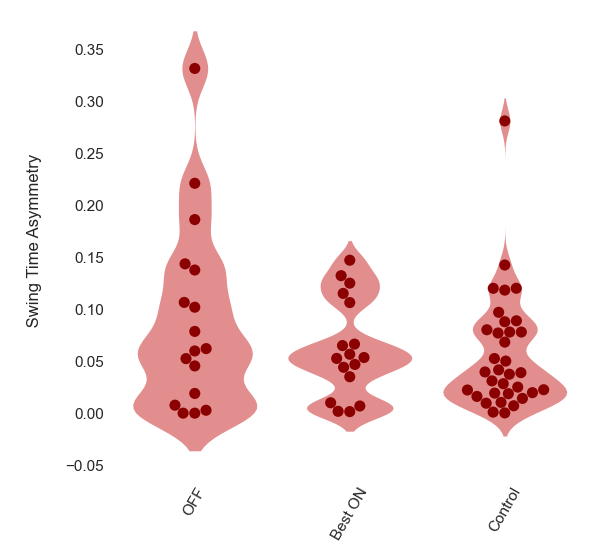

In [283]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Swing Time Asymetry N", data=output_wide_BestON_OFF, color="lightcoral",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Swing Time Asymetry N", x = "Group", data = output_wide_BestON_OFF, color="darkred", edgecolor = "darkred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Swing Time Asymmetry \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', 'Best ON', 'Control'])

sns.set(rc={'figure.figsize':(6,6)})
sns.despine(left=True, bottom=True)



---



---



---



---



---
# PLOT PATIENTS IN SPACE


---



---



---


# t-SNE (t-distributed stochastic neighbor embedding) 


---


In [48]:
from sklearn.manifold import TSNE
from sklearn.metrics import pairwise_distances
from sklearn.manifold import _t_sne


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [67]:
output_wide_BestON_OFF = pd.read_csv('output_wide_BestON_OFF.csv', sep = ';')

In [68]:
output_wide_BestON_OFF = output_wide_BestON_OFF.loc[output_wide_BestON_OFF['Group'] != 'OFF']


In [69]:
output_wide_BestON_OFF

patient  Speed (m/s)  Cadence (steps/min)  Step Time - worst side (s)2  \
17       A     0.929967           117.391304                     0.511304   
18       B     0.846687           103.626943                     0.585606   
19       C     0.594612            98.467622                     0.616463   
20       D     0.700442           102.508475                     0.579545   
21       E     0.843648           108.108108                     0.552381   
22       F     1.069672           112.056738                     0.525000   
23       G     0.886349           113.886114                     0.520588   
24       H     0.978548           130.755712                     0.462121   
25       I     1.028414           114.861461                     0.533333   
26       J     1.077810           128.777613                     0.463232   
27       K     1.601109           146.280992                     0.412931   
28       L     0.757860           107.482993                     0.557051   
29       M     0.675777           105.494506                     0.601471   
30       N     1.086342           141.476128                     0.420000   
31       O     0.915802           107.436823                     0.591379   
32       P     1.144680           133.928570                     0.442310   
33       Q     0.728150           105.942280                     0.557690   
34   Ctrl1     1.428340           139.746840                     0.429325   
35   Ctrl2     0.604800            86.956520                     0.690540   
36   Ctrl3     0.689290            94.581280                     0.633915   
37   Ctrl4     0.738810            94.358970                     0.635675   
38   Ctrl5     0.674100           112.432430                     0.533480   
39   Ctrl6     0.837440           114.358320                     0.524620   
40   Ctrl7     0.735940           104.984740                     0.570680   
41   Ctrl8     0.766870            91.729320                     0.654390   
42   Ctrl9     0.887600           100.949800                     0.594635   
43  Ctrl10     0.967720           114.199400                     0.525370   
44  Ctrl11     0.974690           112.682140                     0.532560   
45  Ctrl12     0.935460           108.253360                     0.554190   
46  Ctrl13     1.000340           115.744680                     0.518385   
47  Ctrl14     1.165160           119.135310                     0.503570   
48  Ctrl15     0.701610            95.252920                     0.629865   
49  Ctrl16     0.655930            97.959180                     0.613100   
50  Ctrl17     0.809500           110.633070                     0.543875   
51  Ctrl18     1.074410           116.923080                     0.513080   
52  Ctrl19     0.973640           112.350600                     0.534400   
53  Ctrl20     0.766870            91.729320                     0.654390   
54  Ctrl21     0.857840           104.541240                     0.573865   
55  Ctrl22     0.728270            94.382020                     0.635710   
56  Ctrl23     0.983150           115.937240                     0.517655   
57  Ctrl24     0.986690           113.117550                     0.533000   
58  Ctrl25     0.864350           106.963790                     0.560935   
59  Ctrl26     0.953190           123.218390                     0.486835   
60  Ctrl27     1.108680           113.436870                     0.528595   
61  Ctrl28     1.041330           115.102040                     0.521220   
62  Ctrl29     0.962580           103.865550                     0.577820   
63  Ctrl30     1.175180           127.285420                     0.470905   
64  Ctrl31     0.956920           110.507670                     0.542695   
65  Ctrl32     0.749640           101.455300                     0.591440   
66  Ctrl33     0.809670           107.290230                     0.559250   
67  Ctrl34     0.971970           103.965830                     0.577485   

In [70]:
groups_output_wide_BestON_OFF = output_wide_BestON_OFF.iloc[:,65:66]
output_wide_BestON_OFF = output_wide_BestON_OFF.iloc[:,1:65]

In [71]:
output_wide_BestON_OFF.iloc[:,1:65]

Cadence (steps/min)  Step Time - worst side (s)2  \
17           117.391304                     0.511304   
18           103.626943                     0.585606   
19            98.467622                     0.616463   
20           102.508475                     0.579545   
21           108.108108                     0.552381   
22           112.056738                     0.525000   
23           113.886114                     0.520588   
24           130.755712                     0.462121   
25           114.861461                     0.533333   
26           128.777613                     0.463232   
27           146.280992                     0.412931   
28           107.482993                     0.557051   
29           105.494506                     0.601471   
30           141.476128                     0.420000   
31           107.436823                     0.591379   
32           133.928570                     0.442310   
33           105.942280                     0.557690   
34           139.746840                     0.429325   
35            86.956520                     0.690540   
36            94.581280                     0.633915   
37            94.358970                     0.635675   
38           112.432430                     0.533480   
39           114.358320                     0.524620   
40           104.984740                     0.570680   
41            91.729320                     0.654390   
42           100.949800                     0.594635   
43           114.199400                     0.525370   
44           112.682140                     0.532560   
45           108.253360                     0.554190   
46           115.744680                     0.518385   
47           119.135310                     0.503570   
48            95.252920                     0.629865   
49            97.959180                     0.613100   
50           110.633070                     0.543875   
51           116.923080                     0.513080   
52           112.350600                     0.534400   
53            91.729320                     0.654390   
54           104.541240                     0.573865   
55            94.382020                     0.635710   
56           115.937240                     0.517655   
57           113.117550                     0.533000   
58           106.963790                     0.560935   
59           123.218390                     0.486835   
60           113.436870                     0.528595   
61           115.102040                     0.521220   
62           103.865550                     0.577820   
63           127.285420                     0.470905   
64           110.507670                     0.542695   
65           101.455300                     0.591440   
66           107.290230                     0.559250   
67           103.965830                     0.577485   

    Step Length - worst side (m)2  Stride Time (s)  Stride Length (m)  \
17                       0.371363         1.020500           0.991977   
18                       0.573895         1.150373           1.057189   
19                       0.403777         1.197222           0.770667   
20                       0.359173         1.246642           0.816020   
21                       0.491905         1.112821           0.931471   
22                       0.559236         1.055303           1.214897   
23                       0.442799         1.049390           0.990611   
24                       0.378457         0.920175           0.946041   
25                       0.567592         1.039062           1.143777   
26                       0.464738         0.928308           1.033979   
27                       0.687235         0.820982           1.302005   
28                       0.483714         1.118987           0.837313   
29                       0.399731         1.137766           0.800632   
30                       0.403944         0.851875           0.935915

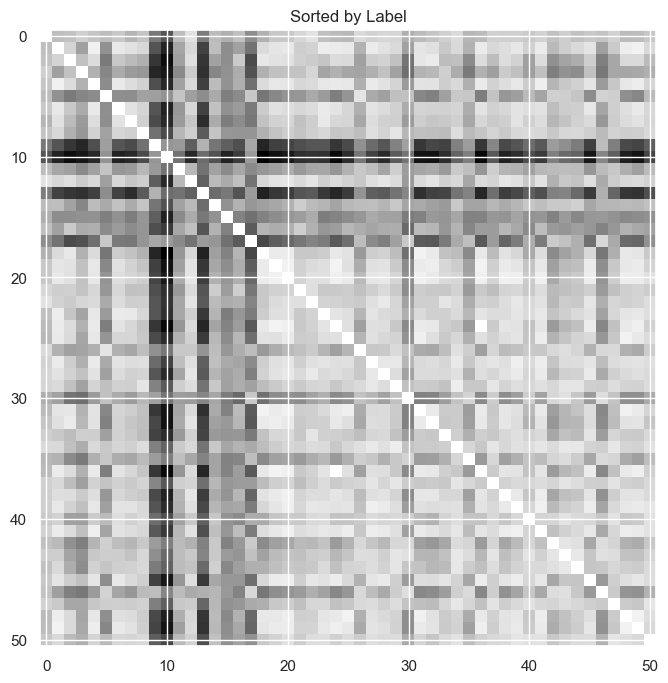

In [72]:
distance_matrix_sorted = pairwise_distances(output_wide_BestON_OFF,
                                            metric='euclidean')
 
fig, ax = plt.subplots(1,1)
ax.imshow(distance_matrix_sorted, 'Greys')
ax.set_title("Sorted by Label")
sns.set(rc={'figure.figsize':(14,14)})

In [73]:
 perplexity = 30  # Same as the default perplexity
p = _t_sne._joint_probabilities(distances=distance_matrix_sorted,
                        desired_perplexity = perplexity,
                        verbose=False)

In [74]:
n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(output_wide_BestON_OFF)
tsne_result.shape

/Users/pauloandrediasbastos/Desktop/Levodopa Challenge Test/Inputs and Code/venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/pauloandrediasbastos/Desktop/Levodopa Challenge Test/Inputs and Code/venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(51, 2)

In [75]:
groups_output_wide_BestON_OFF = groups_output_wide_BestON_OFF.to_numpy()

In [76]:
groups_output_wide_BestON_OFF = groups_output_wide_BestON_OFF.ravel()

In [77]:
tsne_result

array([[ 2.3267757e+01,  1.3800960e+01],
       [-2.7938616e+01,  7.0773344e+00],
       [-4.3346729e+01,  5.1363888e+01],
       [ 2.7220051e+01,  3.3175888e+01],
       [-3.6808456e+01,  1.3497221e+01],
       [ 3.1630838e+01, -3.2201797e+01],
       [-4.3410259e+01,  3.4491053e+00],
       [-4.0680927e+01, -9.9666929e+00],
       [-2.1392265e+01, -1.7951147e+01],
       [ 2.9061853e+01, -5.4861629e+01],
       [ 4.1487087e+01, -4.6763302e+01],
       [ 3.5796009e+01, -1.7565655e+01],
       [ 2.0860770e+00,  2.9701221e+01],
       [ 2.4948313e+01, -6.7129814e+01],
       [ 3.4952488e+01,  5.8962893e-02],
       [-3.6849812e+01, -3.4881958e+01],
       [ 1.0913610e+01,  5.5997948e+01],
       [ 1.1558672e+01, -5.8869427e+01],
       [-3.0970465e+01,  5.8714172e+01],
       [-2.0146711e+01,  3.9648376e+01],
       [-4.2105206e+01,  3.5139496e+01],
       [ 1.1741001e+01,  3.9668434e+01],
       [ 1.3932078e+01,  2.3909109e+01],
       [-2.8702726e+01, -4.1383681e+00],
       [-3.31622

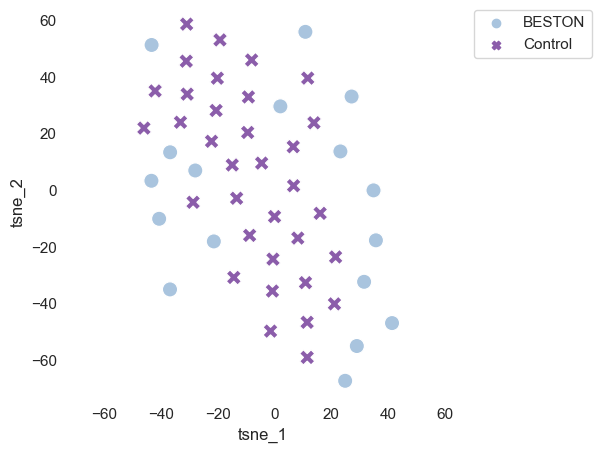

In [79]:
sns.set(style="white")
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': groups_output_wide_BestON_OFF})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, palette="BuPu", style="label", ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
sns.set(rc={'figure.figsize':(5,5)})
sns.despine(left=True, bottom=True)



---

---

---
# Optimize Embedding with Gradient Descent [Kullback-Leibler divergence]


---



---



---




In [62]:
# Create the initial embedding
n_samples = output_wide_BestON_OFF.shape[0]
n_components = 2
X_embedded = 1e-4 * np.random.randn(n_samples,
                                    n_components).astype(np.float32)
 
embedding_init = X_embedded.ravel()  # Flatten the two dimensional array to 1D
 

In [63]:

# kl_kwargs defines the arguments that are passed down to _kl_divergence
kl_kwargs = {'P': p,
             'degrees_of_freedom': 1,
             'n_samples': n_samples,
             'n_components':2}

In [64]:
embedding_init

array([-3.06412083e-04, -1.27927424e-05, -8.72350938e-05, -7.62633863e-05,
       -2.13678737e-04,  3.42103158e-05, -2.50258418e-05, -1.22839683e-05,
       -6.63756146e-05, -1.11587484e-04,  1.03179380e-04,  2.51398742e-05,
       -1.44507940e-04, -1.83256816e-05, -1.29066626e-04,  1.37667550e-04,
        1.45274767e-04, -1.24503771e-04,  5.54506914e-06,  1.21365971e-04,
        1.83106920e-06,  6.76685886e-05,  1.45973143e-04,  5.99632003e-05,
        8.81075903e-05,  1.81191484e-04, -1.02692473e-04,  2.13712410e-05,
        1.28272790e-04, -1.76458179e-05,  1.10847992e-04,  1.41482844e-04,
       -1.10073888e-04,  1.06542357e-04,  1.39593962e-04, -3.73492298e-06,
       -4.85560777e-05,  1.44812395e-04,  8.28857446e-05, -6.83667968e-05,
       -2.62110880e-05, -5.72045155e-06,  9.55059368e-05, -1.24981379e-04,
       -1.48948675e-04, -9.44747735e-05,  1.21231198e-04, -1.47145576e-04,
       -2.47854245e-04,  4.85207056e-05, -2.41717407e-06,  7.49124047e-06,
       -1.49551579e-05,  

In [65]:

# Perform gradient descent
embedding_done = _t_sne._gradient_descent(_t_sne._kl_divergence,
                                          embedding_init,
                                          0,
                                          n_samples,
                                          kwargs=kl_kwargs)
 

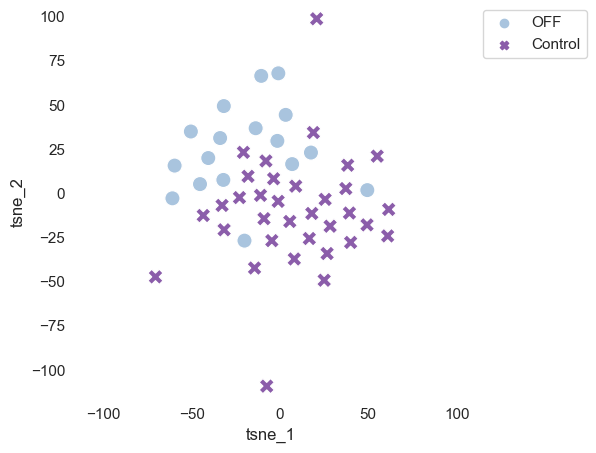

In [66]:

 
# Get first and second TSNE components into a 2D array
tsne_result = embedding_done[0].reshape(n_samples,2)
 
# Convert do DataFrame and plot
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0],
                               'tsne_2': tsne_result[:,1],
                               'label': groups_output_wide_BestON_OFF})
sns.set(style="white")
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', palette="BuPu" , style="label", data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
sns.set(rc={'figure.figsize':(8,8)})
sns.despine(left=True, bottom=True)